<center>
<h1>Sistema de Software para Visualización de Grupos Kleinianos</h1>
<h2>Renato Leriche Vázquez</h2><img width="60" src="LogoUNAM.png"/>Departamento de Matemáticas, Facultad de Ciencias, UNAM<hr>
<img width="120" src="logo_cima.png"/>8 CIMA (Congreso Internacional de Matemáticas y sus Aplicaciones), BUAP
</center>

Presentaremos los avances de desarrollo de un sistema de software, formado por un ecosistema de bibliotecas y una aplicación,

creado para ser útil en la investigación y docencia en el área de sistemas dinámicos discretos.

En particular, revisaremos las bibliotecas de **Visualización**, **Geometría** y **Grupos Kleinianos**.

Este trabajo es parcialmente financiado por el **Programa de Apoyo a Proyectos de Investigación e Innovación Tecnológica** (**PAPIIT**) de la UNAM

en el *Proyecto PAPIIT-UNAM IT103720* con título

> "Sistema de Software para Investigación en Sistemas Dinámicos Discretos"

Equipo de trabajo:
- Responsable: **Dr. Jefferson E. King Dávalos**.
- *Project Manager*: **Renato Leriche Vázquez** (tesista de Doctorado del Dr. Guillermo Sienra).
- *Senior Software Developer*: **Luis Muñiz Valledor** (tesista de Licenciatura del Dr. Marco Montes de Oca).
- *Software Developer*: **José D. Blancas Camarena** (tesista de Licenciatura de Renato Leriche).
- *Software Developer*: **Edgar A. Rodríguez Lucio** (tesista de Licenciatura de Renato Leriche).
- *Software Developer*: **Fernando Santana Plascencia** (tesista de Licenciatura del Dr. Jefferson King).
- *Software Developer*: **Ian X. Belaustegui** (servicio social).
- Colaborador: **Dr. Guillermo F.J. Sienra Loera**.
- Colaborador: **Dr. Marco A. Montes de Oca Balderas**.

(Todos del Departamento de Matemáticas, Facultad de Ciencias, UNAM.)

## Bibliotecas de software

Una *biblioteca de software* proporciona un conjunto de instrucciones (sobre un lenguaje de programación) para construir soluciones a problemas en cierta área.

El software para este proyecto fué desarrollado utilizando el lenguaje de programación ***Julia***.
<center><img width="200" src="julia_logo.png"/></center>

Se elegió este ***Julia*** por ser un lenguaje de programación moderno, especialmente diseñado para cómputo científico y que combina simplicidad con eficiencia.

En esta presentación haremos programación en vivo, pues estamos usando el ambiente ***Jupyter*** que permite usar ***Julia*** de manera fácil e interactiva.

Todo el software que hemos desarrollado es libre y se puede descargar desde ***GitHub***.

# [github.com/Colectivo-SDD](github.com/Colectivo-SDD)

La versión *1.0* estable será publicada hasta Enero del 2022.

***SDD*** es el nombre de nuestro software y significa "Sistemas Dinámicos Discretos".

In [1]:
using Revise, Pkg

In [2]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDCore.jl")

In [3]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDGeometry.jl")

In [4]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDGraphics.jl")

In [5]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDDKleinianGroups.jl")

In [6]:
Pkg.develop(path="/home/rleriche/Software/Dev/SDD/SDD.jl")

In [7]:
using Colors, ColorSchemes

In [8]:
using SDDCore, SDDGeometry, SDDKleinianGroups, SDD

In [9]:
import SDDGraphics
Gr = SDDGraphics
SDDGraphics.backend(:luxor)

:luxor

## La biblioteca para geometría

El nombre de esta biblioteca es ***SDDGeometry***, contiene lo necesario para trabajar con
- Círculos.
- Rectas.
- Transformaciones de Möbius.
- Inversiones.

entre muchas otras cosas.

La instrucción para usar la biblioteca en ***Julia***:

In [10]:
using SDDGeometry

## La biblioteca para visualización

El nombre de esta biblioteca es ***SDDGraphics***.

Usa las bibliotecas ***Luxor*** (para gráficos vectoriales) e ***Images*** (para gráficos de píxeles) como posibles *backends*.

Instrucciones para usar la biblioteca en ***Julia*** y usar el *backend* de ***Luxor***:

In [11]:
import SDDGraphics
Gr = SDDGraphics
Gr.backend(:luxor)

:luxor

## Transformaciones de Möbius

Una **transformación de Möbius** es una función $T:\hat{\mathbb{C}}\rightarrow\hat{\mathbb{C}}$ de la forma

$$T(z)=\frac{az+b}{cz+d}$$

donde $a,b,c,d\in\mathbb{C}$ son tales que $ad-bc\neq 0$.

Las transformaciones de Möbius resultan ser los automorfismos conformes en $\hat{\mathbb{C}}=\mathbb{C}\cup\{\infty\}$ y forman un grupo isomorfo a $PSL(2,\mathbb{C})$.

Podemos crear fácilmente transformaciones de Möbius con la instrucción `MobiusTransformation`.

$T(z)=az - \frac{i}{2}$, con $a=0.95e^{\frac{2\pi i}{15}}$.

In [12]:
T = MobiusTransformation(0.95exp(2π*im/15), -0.5im) # T(z) = az + b

(::AffineTransformation{ComplexF64}) (generic function with 6 methods)

Transformación de Cayley: $K(z)=\frac{z-i}{z+i}$.

In [13]:
K = MobiusTransformation(1, -im, 1, im)

(::MobiusTransformation{Complex{Int64}}) (generic function with 6 methods)

Otro ejemplo más, $P(z)=\frac{z}{2z+1}$.

In [14]:
P = MobiusTransformation(1, 0, 2, 1)

(::MobiusTransformation{Int64}) (generic function with 6 methods)

Podemos evaluar las transformaciones de Möbius en cualquier punto de $\hat{\mathbb{C}}$.

In [15]:
T(0), T(1+im), T(Inf)

(0.0 - 0.5im, 0.48146837383846064 + 0.7542679956824809im, Inf + Inf*im)

In [16]:
K(0), K(-im), K(Inf)

(-1.0 - 0.0im, Inf, 1.0 + 0.0im)

In [17]:
P(-0.5), P(1+im), P(Inf)

(Inf, 0.3846153846153846 + 0.07692307692307694im, 0.5)

Sabemos que las transformaciones de Möbius se clasifican en loxodrómicas, elípticas y parabólicas.

Podemos obtener el tipo con la instrucción `kind`.

In [18]:
kind(T), kind(K), kind(P)

(:loxodromic, :elliptic, :parabolic)

Las transformaciones de Möbius tienen uno o dos puntos fijos, es decir, $z\in\hat{\mathbb{C}}$ tales que $T(z)=z$.

Podemos obtenerlos con la instrucción `fixedpoints`.

In [19]:
fixedpoints(T)

(1.1585254225157122 - 0.39616496372727383im, Inf)

Dibujaremos los puntos fijos.

El procedimiento básico en combinación con la biblioteca de visualización es:
- Configurar el área de dibujo (tamaños de área de dibujo, estilos, etc.).
- Crear una nueva área de dibujo.
- Establecer el color.
- Dibujar los puntos.
- Mostrar el dibujo.

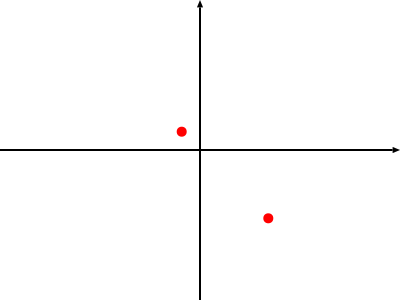

In [20]:
z1, z2 = fixedpoints(K)

Gr.configure(canvas=(400,300), rect=(-4,4,-3,3), pointsize=5, axes=true, bgcolor=RGB(1,1,1)) # Configurar dibujo
Gr.newdrawing() # Crear área de dibujo
Gr.color(RGB(1,0,0)) # Dibujar en color rojo
Gr.drawpoint(z1) # Dibujar punto
Gr.drawpoint(z2) # Dibujar punto
Gr.drawing() # Mostrar dibujo

Podemos dibujar fácilmente un conjunto (finito) de puntos $A\subset\hat{\mathbb{C}}$.

Un conjunto de puntos se contruye mediante un *arreglo*.

In [21]:
A = [ complex(x,y) for x in -1:0.5:1 for y in -1:0.02:1 ]
append!(A, [ complex(x,y) for y in -1:0.5:1 for x in -1:0.02:1 ]);

In [22]:
Gr.configure(canvas=(1200,600), rect=(-4,4,-2,2), pointsize=2)
Gr.newdrawing()
Gr.color(RGB(1,0,0))

(1.0, 0.0, 0.0, 1.0)

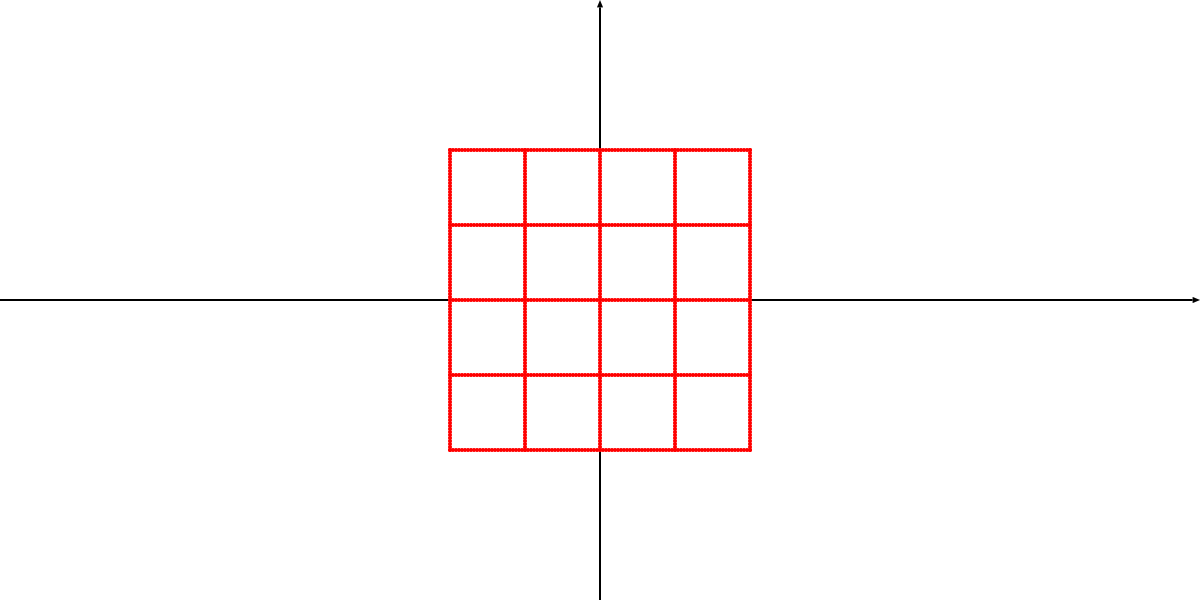

In [23]:
Gr.drawpoint.(A) # Dibujando el conjunto A
Gr.drawing()

Asimismo, podemos dibujar fácilmente $T(A)$.

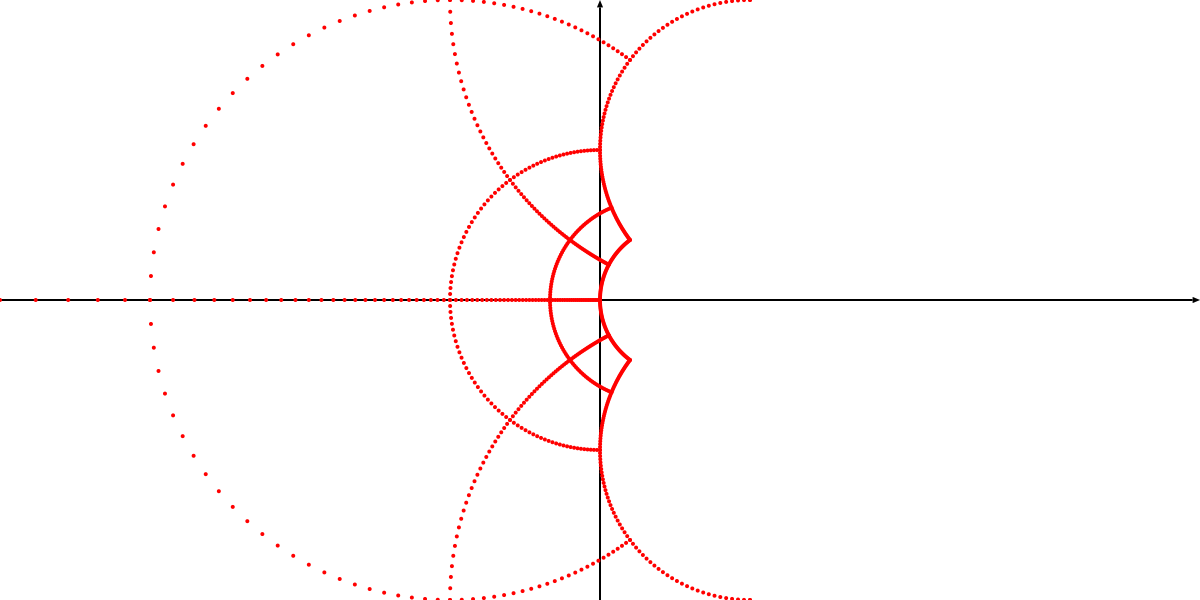

In [38]:
Gr.newdrawing()
Gr.drawpoint.(K.(A)) # Dibujando el conjunto T(A)
Gr.drawing()

Podemos crear fácilmente círculos y rectas con las instrucciones `Circle` y `Line`.

In [39]:
s1 = Circle(0, 1) # Círculo con centro en 0 y radio 1
c2 = Circle(im, 2) # Círculo con centro en i y radio 2
l1 = Line(0, 0) # Recta que pasa por 0 y tiene ángulo 0 con el eje X
l2 = Line(1, π/4) # ...

Line{Int64,Float64}: base point 1, angle with X 0.7853981633974483

Podemos dibujar círculos y rectas fácilmente.

In [40]:
Gr.configure(linewidth=3, style=:stroke)
Gr.newdrawing()
Gr.color(RGB(1,0,0)); Gr.drawcircle(s1) # Color rojo; dibujar círculo s1
Gr.color(RGB(1,1,0)); Gr.drawcircle(c2) # Color amarillo; dibujar círculo c2
Gr.color(RGB(0,0,1)); Gr.drawline(l1) # Color azul; dibujar línea l1
Gr.color(RGB(0,1,0)); Gr.drawline(l2); # Color verde; dibujar línea l2

2-element Vector{Luxor.Point}:
 Luxor.Point(-299.00000000000006, -300.00000000000006)
 Luxor.Point(301.0, 300.00000000000006)

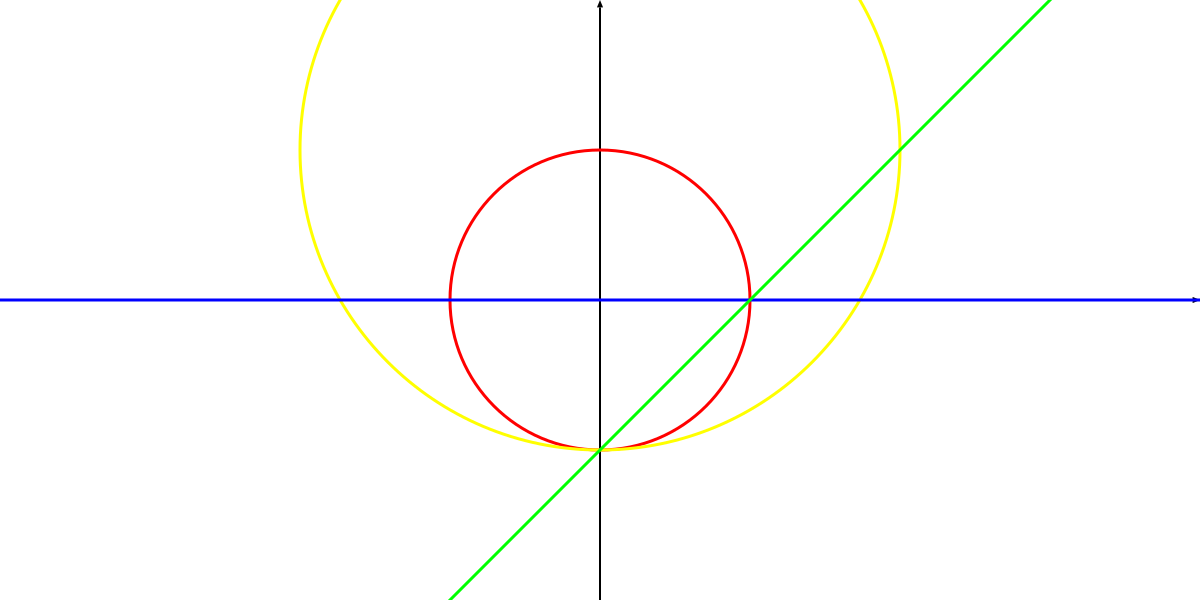

In [41]:
Gr.drawing()

Las imágenes de círculos en $\hat{\mathbb{C}}$ bajo transformaciones de Möbius son círculos en $\hat{\mathbb{C}}$.

Recordemos que los círculos en $\hat{\mathbb{C}}$ se ven como círculos o rectas en $\mathbb{C}$.

Podemos evaluar directamente nuestras transformaciones de Möbius con círculos o rectas.

Imágenes de círculos y rectas bajo $T(z)=az+i/2$.

In [42]:
Gr.newdrawing()
Gr.color(RGB(1,0,0)); Gr.drawcircle(T(s1))
Gr.color(RGB(1,1,0)); Gr.drawcircle(T(c2))
Gr.color(RGB(0,0,1)); Gr.drawline(T(l1))
Gr.color(RGB(0,1,0)); Gr.drawline(T(l2));

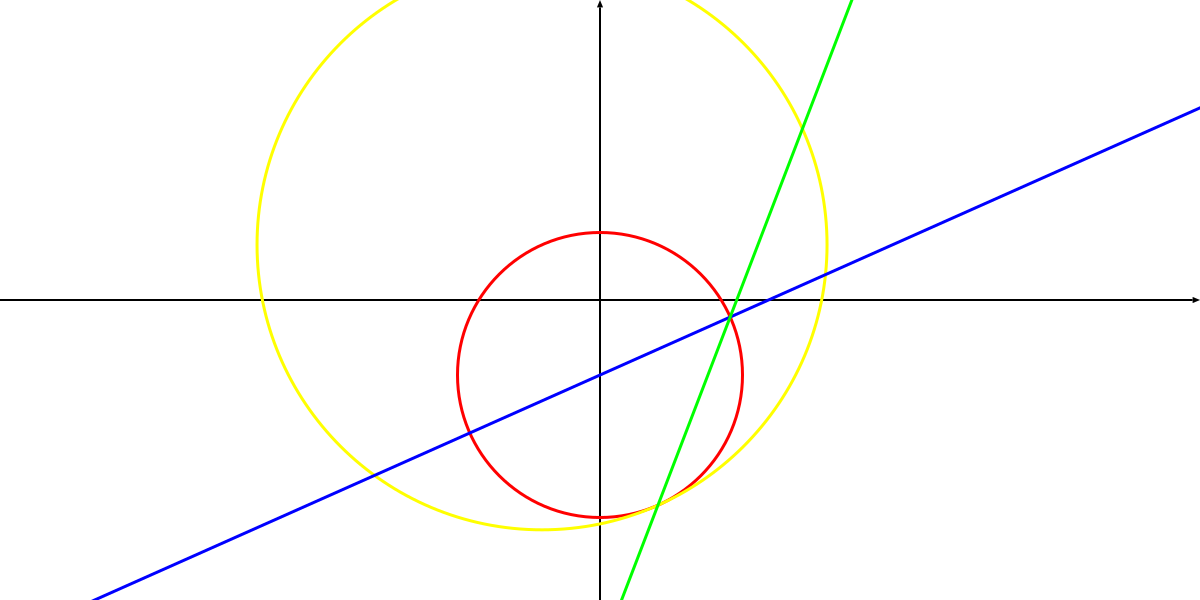

In [43]:
Gr.drawing()

Imágenes bajo $K(z)=\frac{z-i}{z+i}$.

In [44]:
K(s1) # s1 es círculo...

Line{ComplexF64,Float64}: base point 0.0 - 0.0im, angle with X -1.5707963267948966

In [45]:
K(l1) # l1 es recta...

Circle{ComplexF64,Float64}: |z - (2.0 + 0.0im)| = 1.0

In [46]:
Gr.newdrawing()
Gr.color(RGB(1,0,0)); Gr.drawline(K(s1))
Gr.color(RGB(1,1,0)); Gr.drawline(K(c2))
Gr.color(RGB(0,0,1)); Gr.drawcircle(K(l1))
Gr.color(RGB(0,1,0)); Gr.drawline(K(l2));

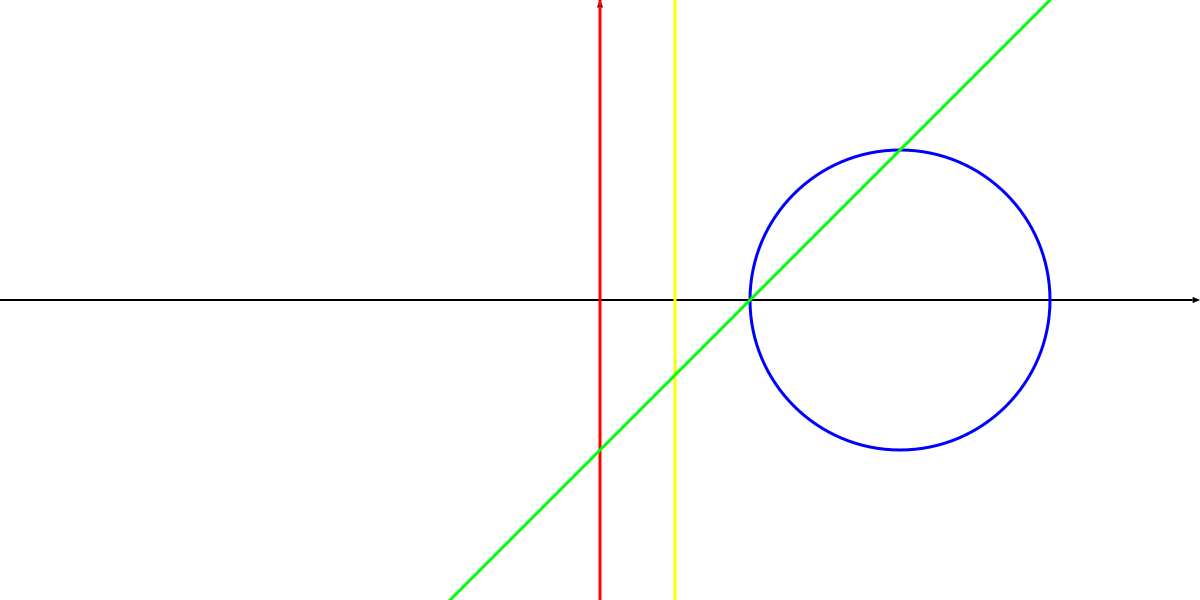

In [47]:
Gr.drawing()

Podemos obtener las inversas de las transformaciones de Möbius con la instrucción `inverse`.

In [48]:
Tinv = inverse(T)
Kinv = inverse(K)
Pinv = inverse(P)

(::MobiusTransformation{Int64}) (generic function with 6 methods)

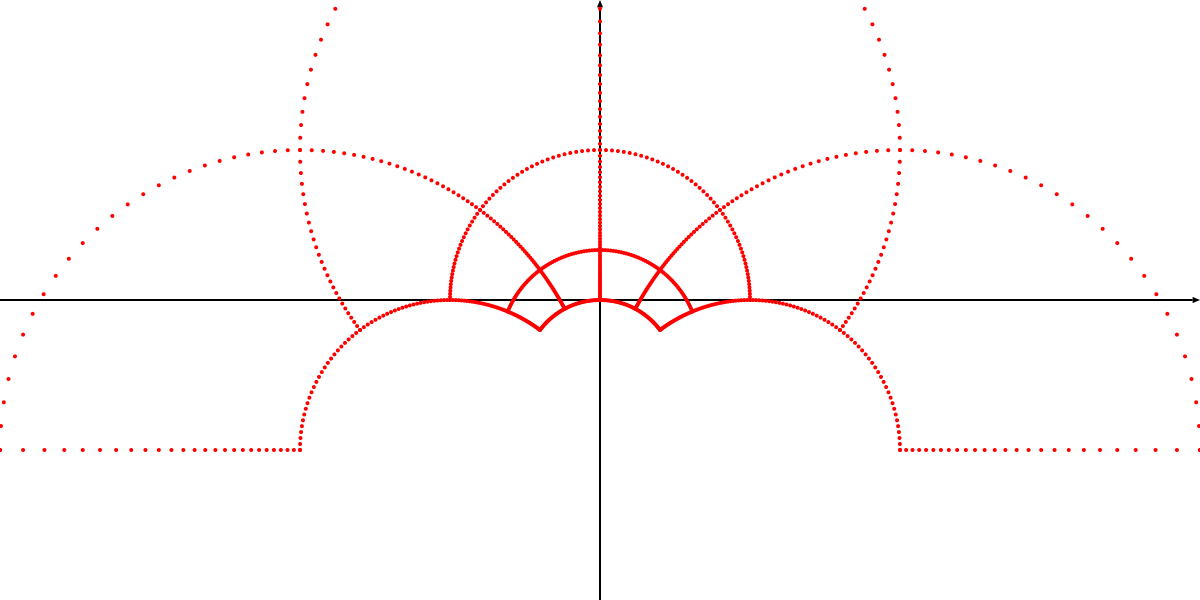

In [50]:
Gr.configure(rect=(-4,4,-2,2), pointsize=2)
Gr.newdrawing()
Gr.color(RGB(1,0,0))
Gr.drawpoint.(Kinv.(A))
Gr.drawing()

Podemos componer funciones con el operador `°`.

In [51]:
KT = K∘T

(::MobiusTransformation{ComplexF64}) (generic function with 6 methods)

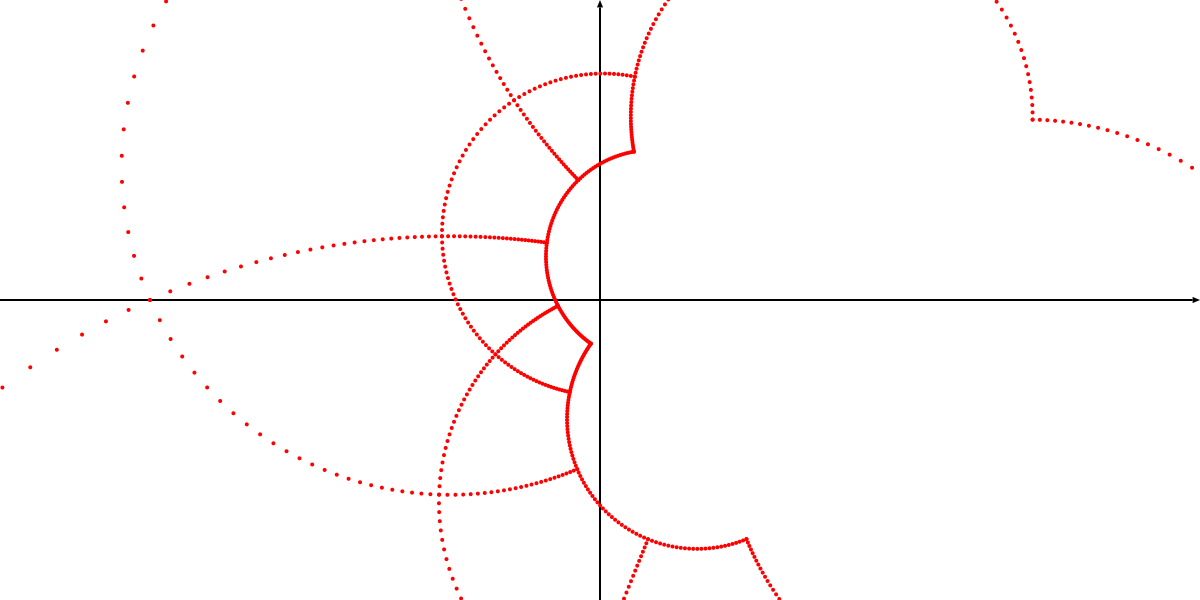

In [52]:
Gr.newdrawing()
Gr.drawpoint.(KT.(A))
Gr.drawing()

Dados tres puntos distintos $z_1, z_2, z_3\in \hat{\mathbb{C}}$, se puede construir la transformación de Möbius tal que

$$z_1\mapsto 0,\, z_2\mapsto 1,\, z_3\mapsto \infty$$

Para esto tenemos la instrucción `maptozerooneinf`,

y `mapfromzerooneinf`, que construye la trnasformación que hace el proceso inverso.

Construiremos $f_1$ tal que

$$z_1 = -2-2i \mapsto 0$$
$$z_2=-4\mapsto 1$$
$$z_3=-2+2i\mapsto \infty$$

y $f_2$ tal que

$$0 \mapsto w_1=0$$
$$1 \mapsto w_2=2-2i$$
$$\infty \mapsto w_3=1+i$$

In [53]:
z1, z2, z3 = -2-2im, -4, -2+2im
w1, w2, w3 = 0, 2-2im, 1+im

(0, 2 - 2im, 1 + 1im)

In [54]:
f1 = maptozerooneinf(z1, z2, z3)
f2 = mapfromzerooneinf(w1, w2, w3)

(::MobiusTransformation{Complex{Int64}}) (generic function with 6 methods)

Así, podemos construir $f=f_2\circ f_1$, la cual es cumple que

$$z_1=-2-2i \mapsto w_1=0$$
$$z_2=1\mapsto w_2=2-2i$$
$$z_3=-2+2i\mapsto w_3=1+i$$

In [55]:
f = f2∘f1

(::MobiusTransformation{Complex{Int64}}) (generic function with 6 methods)

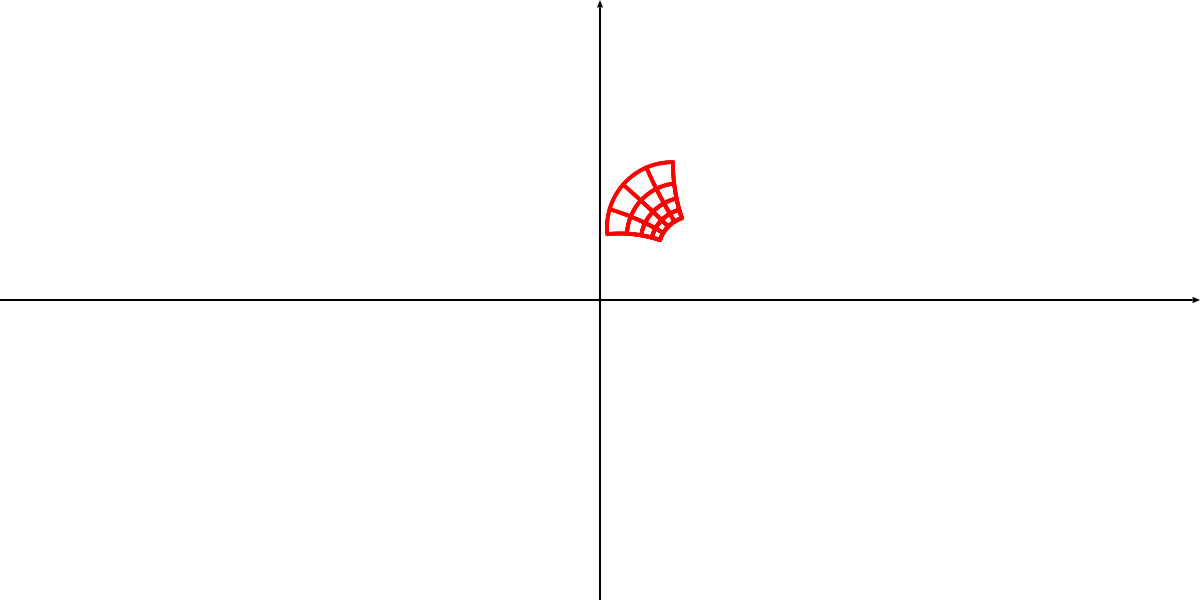

In [56]:
Gr.newdrawing()
Gr.drawpoint.(f.(A))
Gr.drawing()

## Inversiones

Una **inversión** (por un círculo) es una función $I_{z_0,r}:\hat{\mathbb{C}}\rightarrow\hat{\mathbb{C}}$ de la forma

$$I_{z_0,r}(z)=\frac{r^2}{\overline{z-z_0}}+z_0$$

donde $z_0$ es el centro y $r$ el radio del círculo de inversión.

Un tipo particular de inversión es la **reflexión** por una recta, que es una función $R_\mathcal{L}:\hat{\mathbb{C}}\rightarrow\hat{\mathbb{C}}$ de la forma

$$R_\mathcal{L}(z)=e^{2\theta i}(\overline{z-z_0})+z_0$$

donde $\mathcal{L}$ es una recta que pasa por $z_0$ y hace ángulo $\theta$ con el eje $X$.

Podemos crear inversiones y reflexiones con las instrucciones `CircleInversion` y `Reflection`, respectivamente.

In [57]:
I = CircleInversion(0, 1)
I2 = CircleInversion(1+im, 1.5)
RY = Reflection(0, π/2)
R2 = Reflection(1, π/4)

(::Reflection{Int64, Float64}) (generic function with 6 methods)

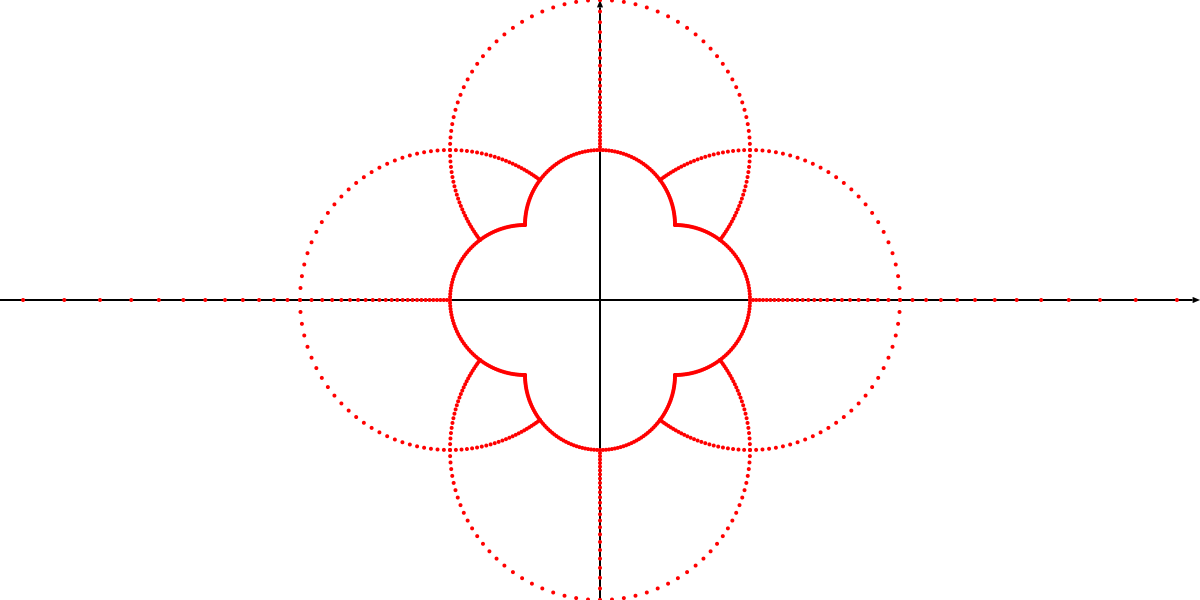

In [60]:
Gr.newdrawing()
Gr.drawpoint.(I.(A)) # Inversión aplicada al conjunto A
Gr.drawing()

Las inversiones y reflexiones también llevan círculos en $\hat{\mathbb{C}}$ a círculos en $\hat{\mathbb{C}}$.

In [61]:
Gr.newdrawing()
Gr.color(RGB(1,0,0)); Gr.drawcircle(I2(s1))
Gr.color(RGB(1,1,0)); Gr.drawcircle(I2(c2))
Gr.color(RGB(0,0,1)); Gr.drawcircle(I2(l1))
Gr.color(RGB(0,1,0)); Gr.drawcircle(I2(l2));

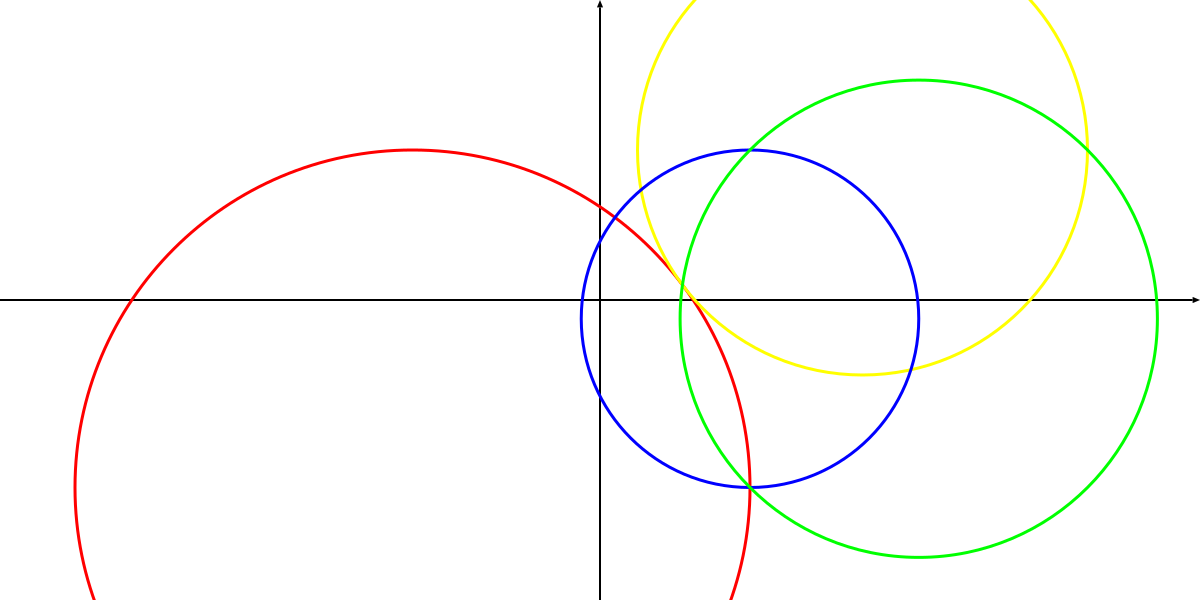

In [62]:
Gr.drawing()

## La biblioteca para grupos Kleinianos (y anexos)

El nombre de esta biblioteca es ***SDDKleinianGroups***, aunque en realidad se puede trabajar con casi cualquier subgrupo de $PSL(2,\mathbb{C})$, con grupos de inversiones o con grupos combinados.

Contiene la implementación de algoritmos para dibujar:

- Órbitas de puntos, conjuntos de puntos, círculos y rectas.

- Conjuntos límite de grupos, con varios algoritmos.

La instrucción para usar la biblioteca en ***Julia*** es:

In [63]:
using SDDKleinianGroups

## Grupos de transformaciones

Dadas $n$ transformaciones $T_1,\dots,T_n$ (que pueden ser de Möbius o inversiones), trabajaremos con el **grupo finitamente generado**

$$\big<T_1,\dots,T_n\big> = \{S^{m_1}_1\circ \dots \circ S^{m_k}_k \, | \, S_j=T_i,\, m_j\in\mathbb{Z}, \, k\in\mathbb{N} \} $$

En especial nos interesan los grupos discretos de $PSL(2,\mathbb{C})$, llamados **grupos Kleinianos**,

y los grupos discretos de inversiones.

Estos grupos de transformaciones son de gran importancia en Geometría (hiperbólica, esférica, superficies de Riemann, $3$-variedades, etc.) y por sus relaciones con otras áreas de las matemáticas (sistemas dinámicos, teoría de números, topología, álgebra, etc.).

## Órbitas

Dado un punto $z\in\hat{\mathbb{C}}$ y un grupo $G$ de transformaciones en $\hat{\mathbb{C}}$, la **órbita** de $z$ bajo $G$ es

$$Gz = \bigcup_{g\in G} \{g(z)\}$$

Dada una transformación $T$, podemos graficar (una parte finita de) la órbita de un punto bajo el grupo cíclico $G=\big< T \big>$ con la instrucción `drawpointorbit`.

Dada una cantidad $N$ de iteraciones y un punto $z_0$, se dibujarán $N$ iteraciones hacía adelante y $N$ iteraciones hacía atrás del punto.

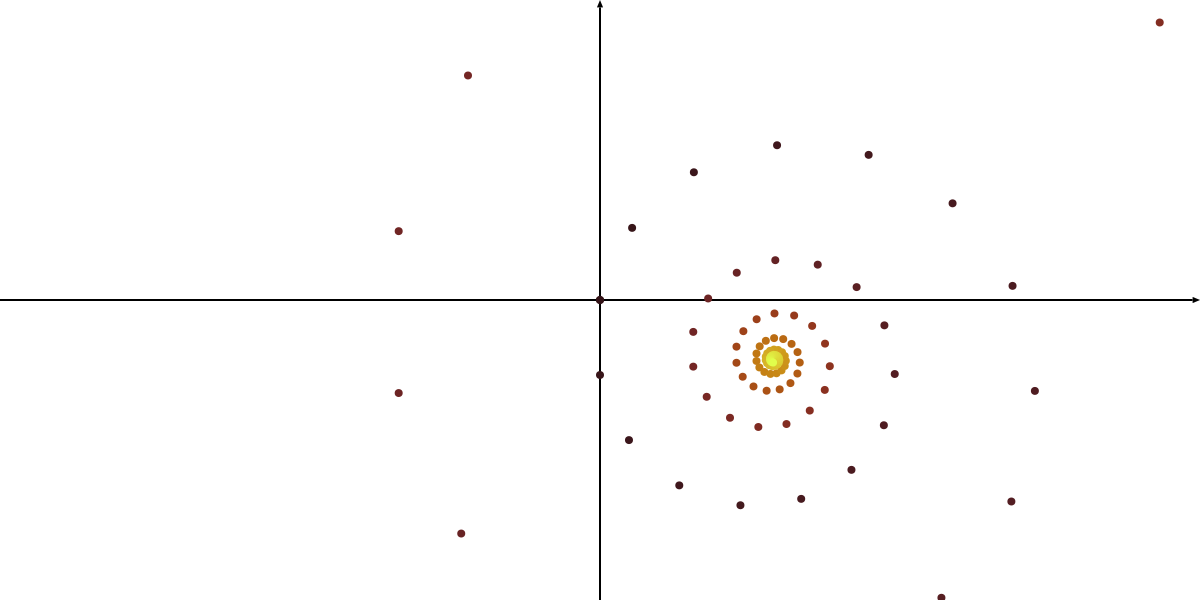

In [65]:
Gr.configure(pointsize=4)
drawpointorbit(T, 0, iterations=80)

Una más intersante: $S(z)=\frac{(1+6i)z+1}{z+1+6i}$

In [66]:
S = MobiusTransformation(1+6im, 1, 1, 1+6im)

(::MobiusTransformation{Complex{Int64}}) (generic function with 6 methods)

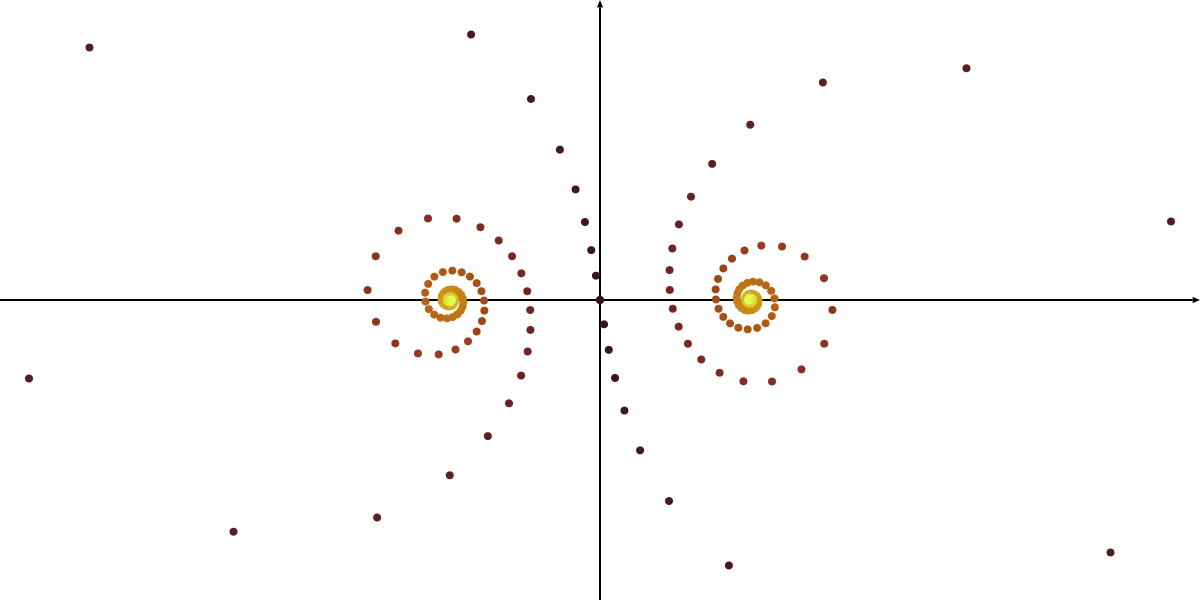

In [67]:
drawpointorbit(S, 0, iterations=100)

Podemos dibujar la órbita de un conjunto bajo un grupo cíclico, con la instrucción `drawpointssetorbit`.

$$\big< T \big>A = \bigcup_{g\in \big< T \big>} g(A)$$

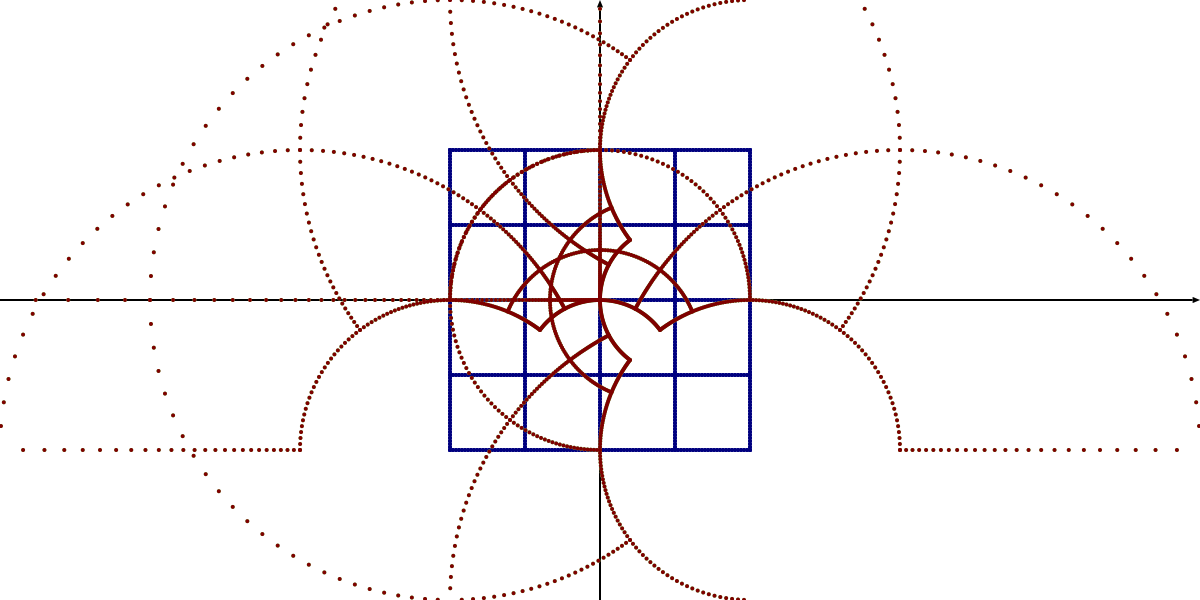

In [69]:
Gr.configure(pointsize=2, colormap=:jet)
drawpointssetorbit(K, A, iterations=3)

Podemos dibujar la órbita de círculos en $\hat{\mathbb{C}}$ bajo un grupo cíclico, con la instrucción `drawcircleorbit`.

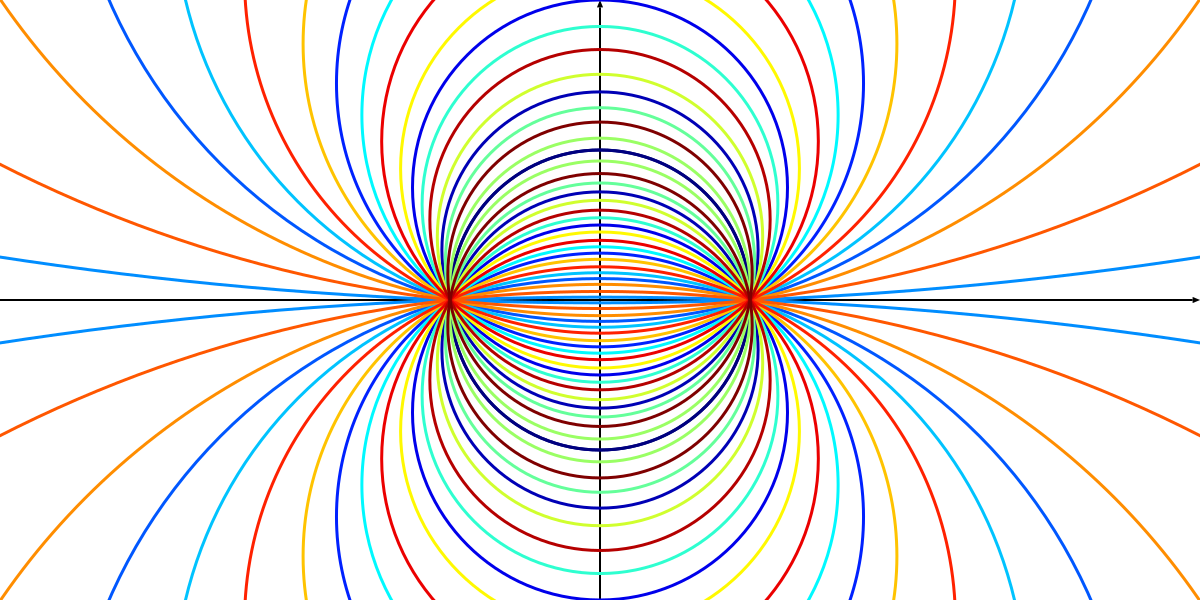

In [71]:
Gr.configure(style=:stroke)
drawcircleorbit(S, s1, iterations=20)

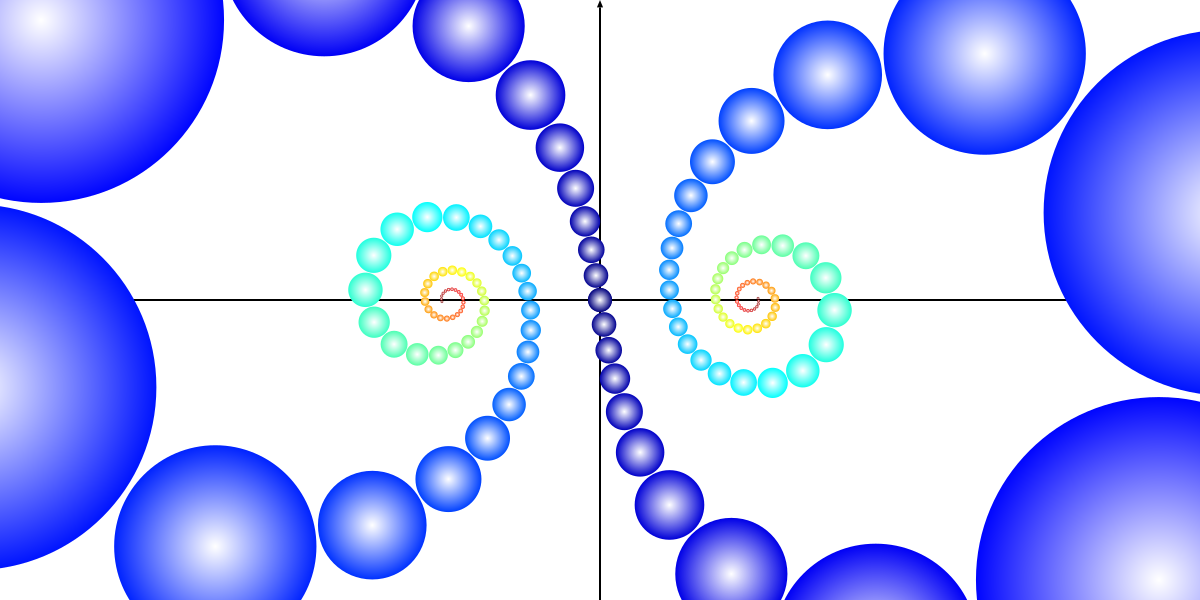

In [72]:
Gr.configure(style=:pearl)
drawcircleorbit(S, Circle(0,0.08), iterations=70)

Podemos dibujar la órbita de varios círculos en $\hat{\mathbb{C}}$ bajo un grupo cíclico, con la instrucción `drawcirlcessetorbit`.

In [73]:
littlecircles = [Circle(0,0.08),Circle(0.16,0.08),Circle(-0.16,0.08)] # Conjunto de círculos

3-element Vector{Circle{N, Float64} where N<:Number}:
 Circle{Int64,Float64}: |z - (0)| = 0.08
 Circle{Float64,Float64}: |z - (0.16)| = 0.08
 Circle{Float64,Float64}: |z - (-0.16)| = 0.08

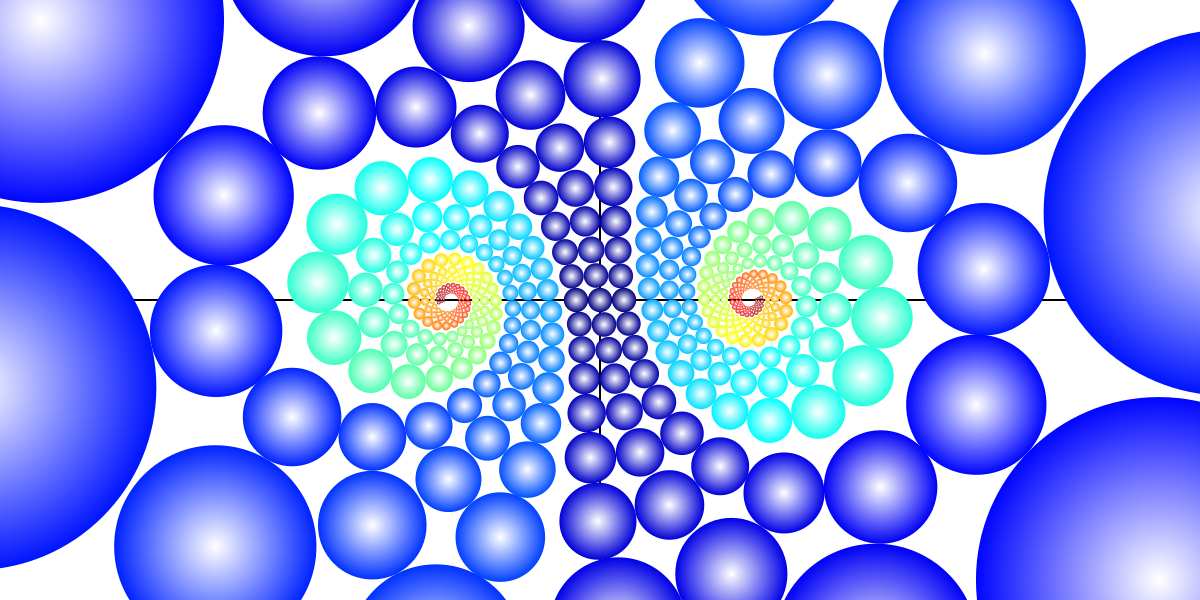

In [74]:
drawcirclessetorbit(S, littlecircles, iterations=70)

Las mismas instrucciones pueden dibujar orbitas de puntos, de conjuntos de puntos y de círculos en $\hat{\mathbb{C}}$ bajo cualquier grupo finitamente generado.

Sólo se requiere construir conjunto (*arreglo*) de transformaciones y el uso es análogo.

Tomemos la familia de grupos *casi-Fuchsianos* $\big< \gamma_1, \gamma_2\big>$ donde

$$ \gamma_1(z)=\frac{xz+y}{yz+x} $$

$$ \gamma_2(z)=\frac{uz+kvi}{-\frac{1}{k}viz+u} $$

con $x=\sqrt{1+y^2}$, $u=\sqrt{1+v^2}$ y $\frac{1}{2}(k+\frac{1}{1+k})=\frac{1}{yv}$.

In [75]:
k = 2.2
y = 0.75
x = sqrt(1+y^2)
v = 2.0/(y*(k+1/k))
u = sqrt(1+v^2)

γ1 = MobiusTransformation(x, y, y, x)
γ2 = MobiusTransformation(u, k*v*im, -v*im/k, u)

(::MobiusTransformation{ComplexF64}) (generic function with 6 methods)

Dibujaremos la órbita de un punto bajo $\big< \gamma_1, \gamma_2\big>$, usando `drawpointorbit`.

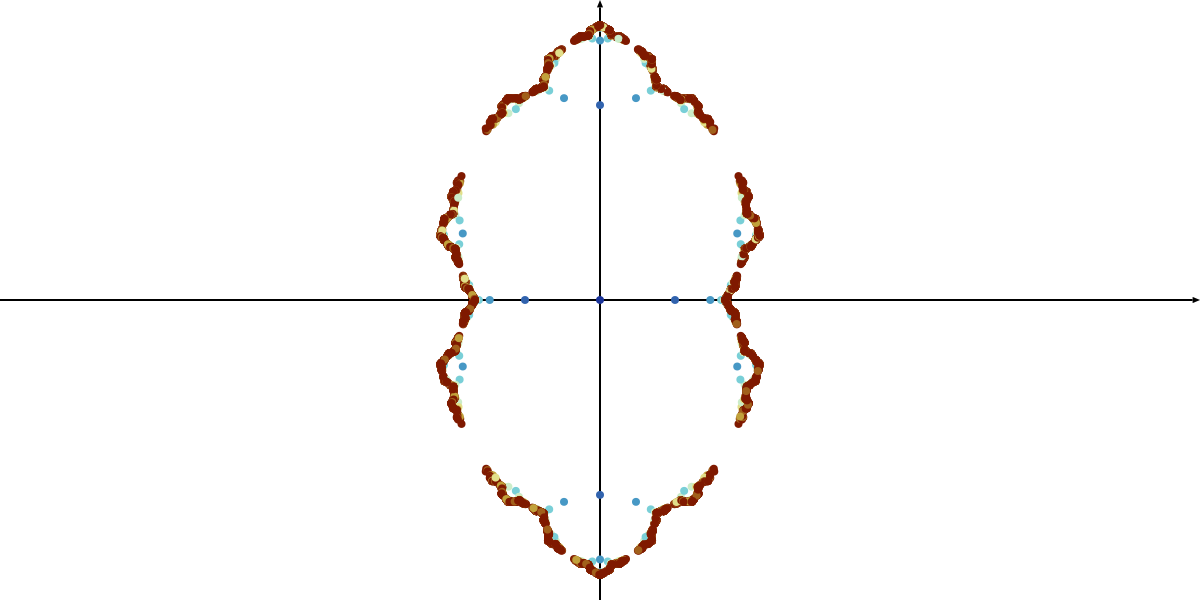

In [76]:
Gr.configure(rect=(-4.8,4.8,-2.4,2.4), pointsize=4, colormapinv=:roma)
drawpointorbit([γ1, γ2], 0, iterations=8)

Ahora dibujaremos la órbita de un conjunto de puntos $A$ bajo $\big< \gamma_1, \gamma_2\big>$, usando `drawpointssetorbit`.

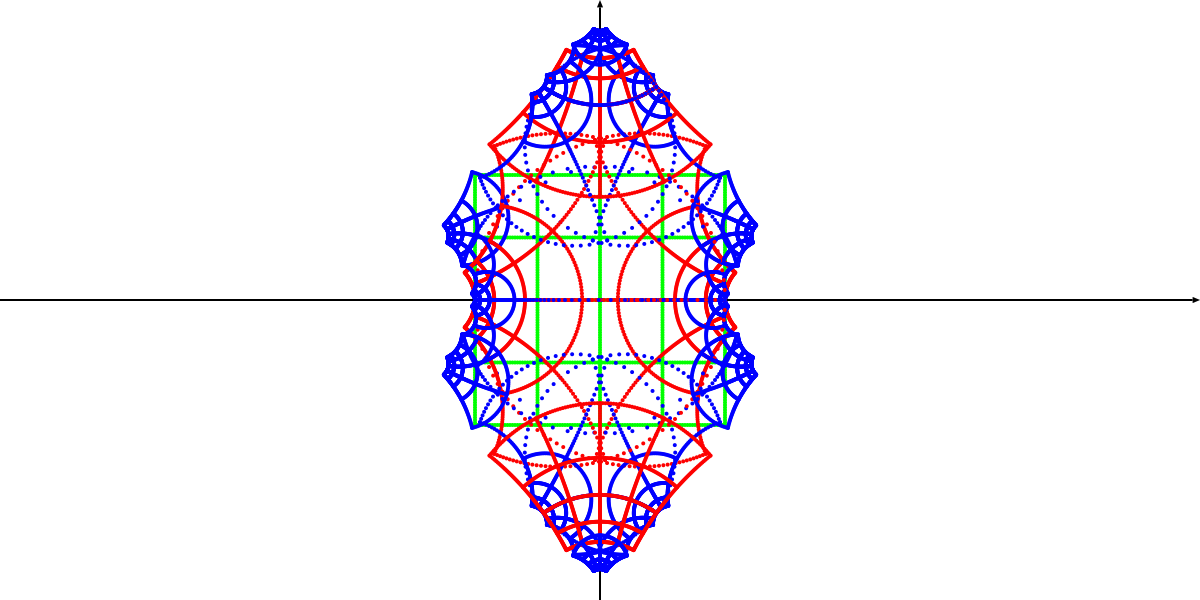

In [77]:
Gr.configure(pointsize=2, colormapinv=:brg)
drawpointssetorbit([γ1, γ2], A, iterations=2)

Un ejemplo más iteresante, construiremos una (aproximación a una) teselación de pentágonos regulares (hiperbólicos) en el disco de Poincaré.

In [78]:
rot5 = MobiusTransformation(exp((2π/5)*im))

θ = π/4.8
r = tan(θ)
c = 1/cos(θ)
x0, z0 = c-r, exp(θ*im)
h = MobiusTransformation(x0, z0, conj(z0), x0, conj(z0), z0)

side = [ c+(r-0.02)*exp((t+pi)*im) for t in -0.6:0.02:0.6 ];

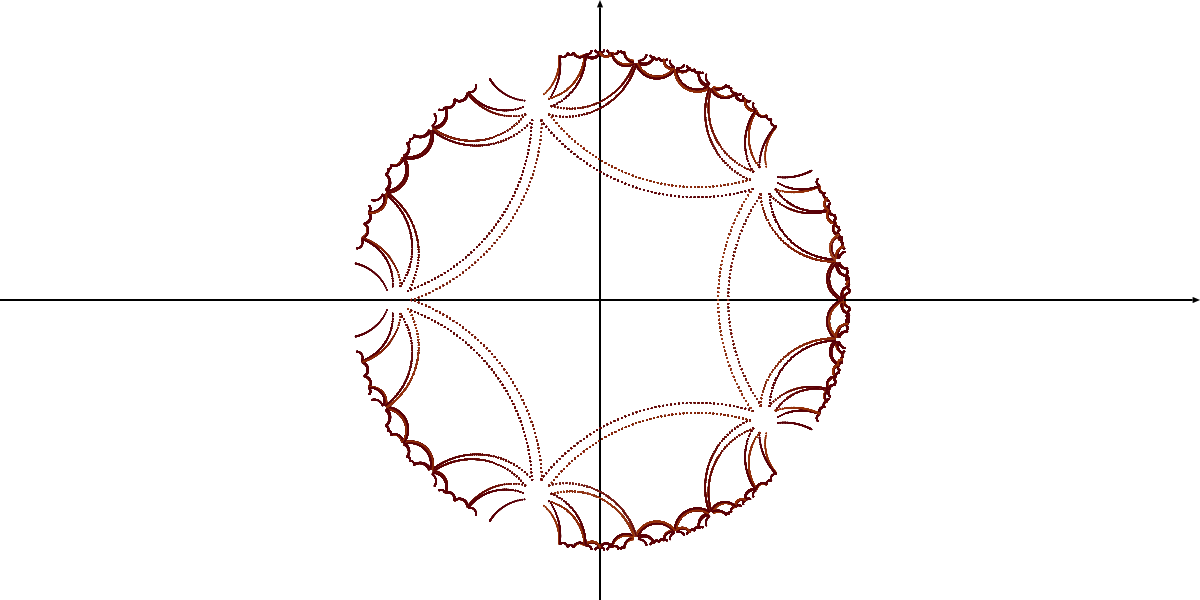

In [79]:
Gr.configure(rect=(-2.4,2.4,-1.2,1.2), pointsize=0.75, colormap=:vik)
drawpointssetorbit([rot5, h], side, iterations=8)

Podemos dibujar la orbita de un círculo bajo cualquier grupo con `drawcircleorbit`.

Tomemos por ejemplo al grupo *modular clásico* $M=\big< z\mapsto z+1, z\mapsto -\frac{1}{z}\big>$.

In [80]:
modular = [Translation(1), InversionReflection(-1)]

2-element Vector{AbstractMobiusTransformation}:
 (::Translation{Int64}) (generic function with 6 methods)
 (::InversionReflection{Int64}) (generic function with 6 methods)

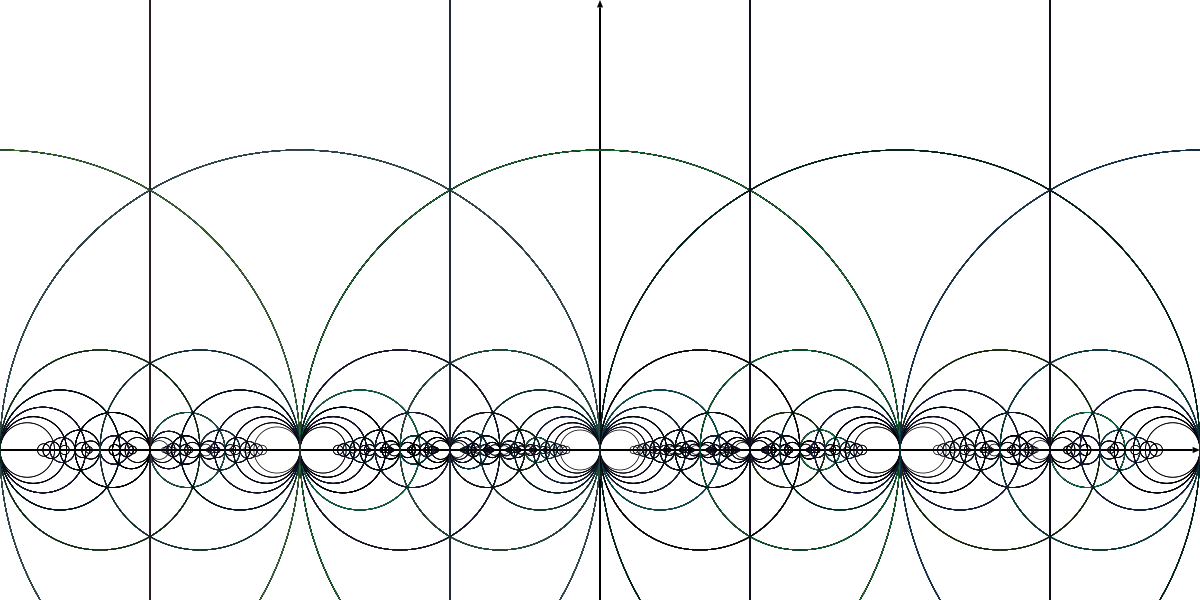

In [81]:
Gr.configure(rect=(-2,2,-0.5,1.5), style=:stroke, linewidth=0.75, colormapinv=:cubehelix)
drawcircleorbit(modular, s1, iterations=10)

Para el grupo modular en el disco unitario $\mathbb{D}$, basta conjugar con una transformación adecuada el grupo modular clásico.

In [82]:
T = MobiusTransformation(im,1,Inf,0,1,im)
Tinv = inverse(T)

(::MobiusTransformation{Complex{Int64}}) (generic function with 6 methods)

In [83]:
modulardisc = [T∘modular[1]∘Tinv, T∘modular[2]∘Tinv];

Ahora dibjaremos la órbita de una recta bajo el grupo $TMT^{-1}$ (modular en $\mathbb{D}$).

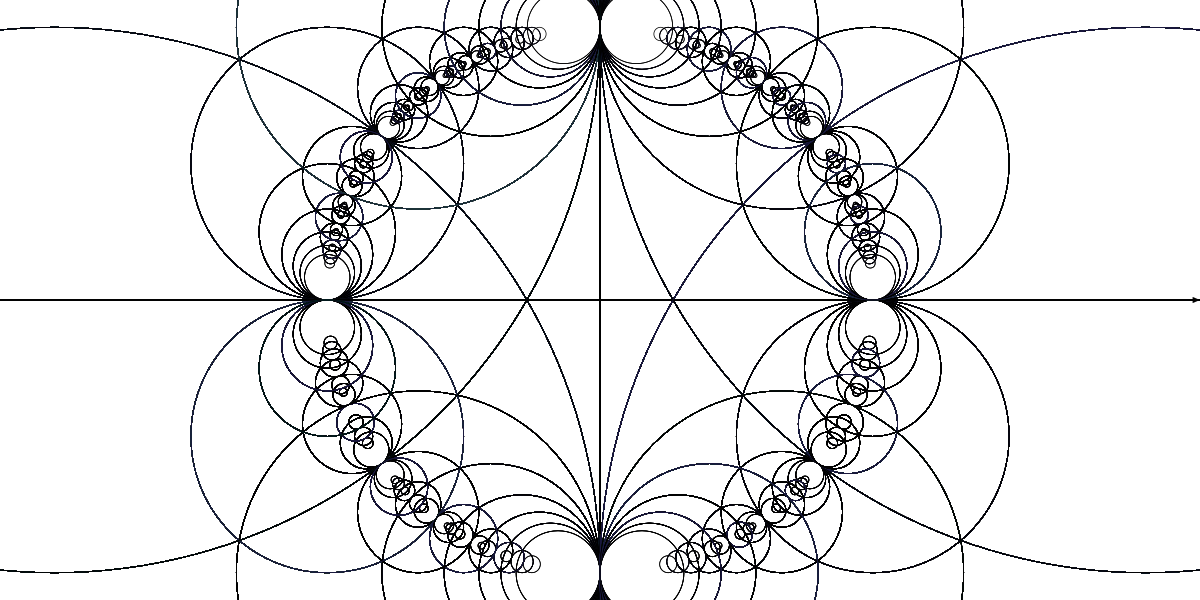

In [84]:
Gr.configure(rect=(-2.2,2.2,-1.1,1.1), style=:stroke, linewidth=0.75, colormapinv=:cubehelix)
drawcircleorbit(modulardisc, Line(0,0), iterations=9)

Un ejemplo más de la órbita de un círculo.

Tomemos el grupo $\big<A_1, A_2\big>$ dado por

$$ A_1(z)=\frac{z}{-2iz+1} $$

$$ A_2(z)=\frac{(1-i)z+1}{z+1+i} $$

relacionado con una *carpeta de Apolonio*.

In [85]:
apollonian = [MobiusTransformation(1,0,-2im,1), MobiusTransformation(1-im,1,1,1+im)];

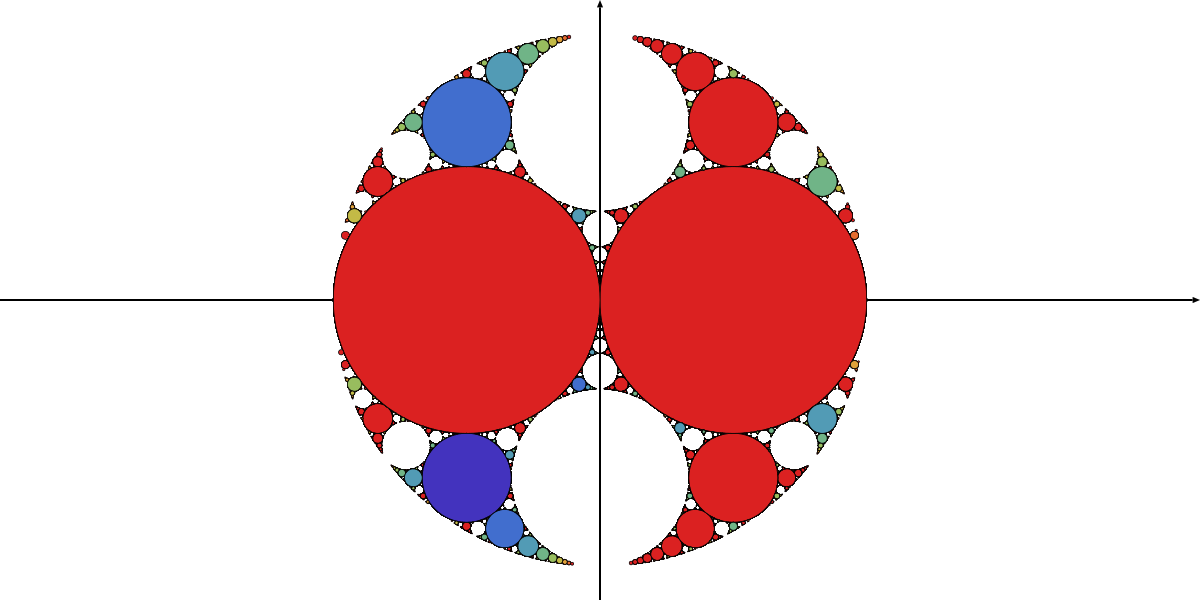

In [86]:
Gr.configure(rect=(-9/4,9/4,-9/8,9/8), style=:fillborder, colormap=:rainbow)
drawcircleorbit(apollonian, Circle(-0.5,0.5), iterations=9)

Podemos dibujar la órbita de varios discos bajo un grupo con `drawcirclessetorbit`.

Un buen ejemplo para el dibujo de órbitas de conjuntos de círculos son los *grupos de Schottky*.

Dados círculos disjuntos $D_a,D_A,D_b,D_B\subset\hat{\mathbb{C}}$ con interiores disjuntos, un **grupo de Schottky** $\big<f_a, f_b\big>$, está dado por transformaciones de Möbius tales que $$f_a(D_A)=D_a$$ y $$f_b(D_B)=D_b$$

Además $$f_a(ext(D_A))=int(D_a)$$ y $$f_b(ext(D_B))=int(D_b)$$

In [87]:
Da, Db, DA, DB = Circle(2.0+2im,1.75), Circle(1.7-1.4im,1.6), Circle(-2.0-2im,2.0), Circle(-2.0+2im,1.8)
schottkycircles = [Da, Db, DA, DB];

In [88]:
fa = MobiusTransformation(pickpoint(DA,0), pickpoint(DA,π/4), pickpoint(DA,π/2),
       pickpoint(Da,3π/2), pickpoint(Da,5π/4), pickpoint(Da,π)) # DA to Da
fb = MobiusTransformation(pickpoint(DB,0), pickpoint(DB,π/2), pickpoint(DB,π),
       pickpoint(Db,0), pickpoint(Db,3π/2), pickpoint(Db,π)) # DB to Db

schottkygenerators = [fa, fb];

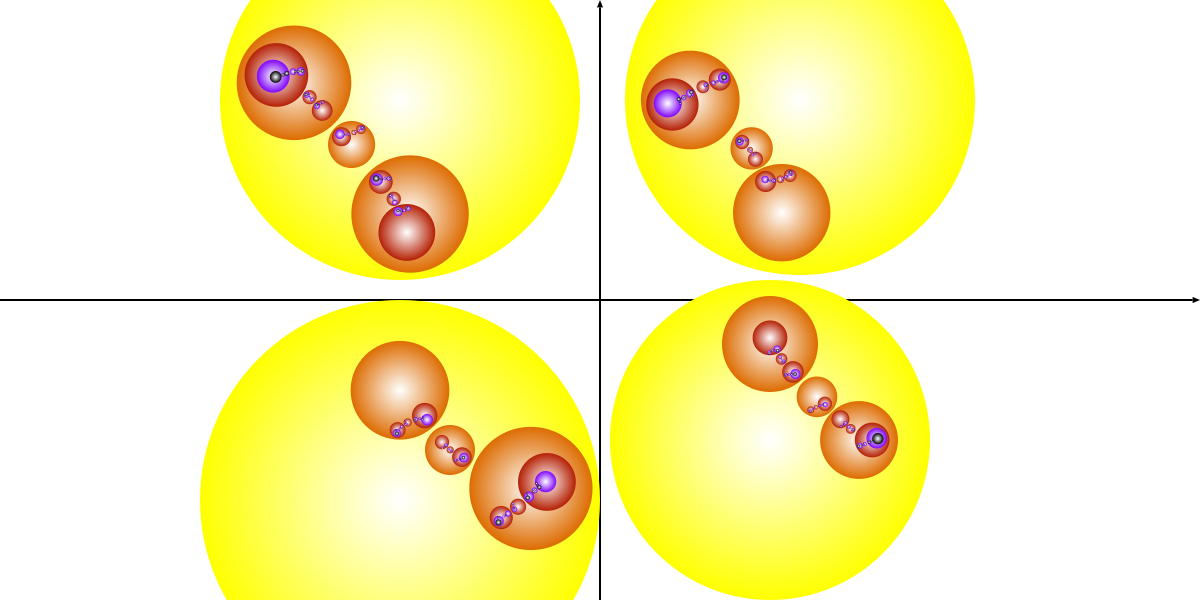

In [89]:
Gr.configure(rect=(-6,6,-3,3), style=:pearl, colormapinv=:gnuplot)
drawcirclessetorbit(schottkygenerators, schottkycircles, iterations=4, traverse=:firstbreath, paired=true)

Un ejemplo similar es la órbita de círculos bajo un grupo de inversiones $\big< I_1, I_2, I_3\big>$ en círculos disjuntos.

In [90]:
inversioncircles = [Circle(-2,2), Circle(1.5-2im,2), Circle(2+1.75im,1.75)]
inversions = [CircleInversion(c) for c in inversioncircles];

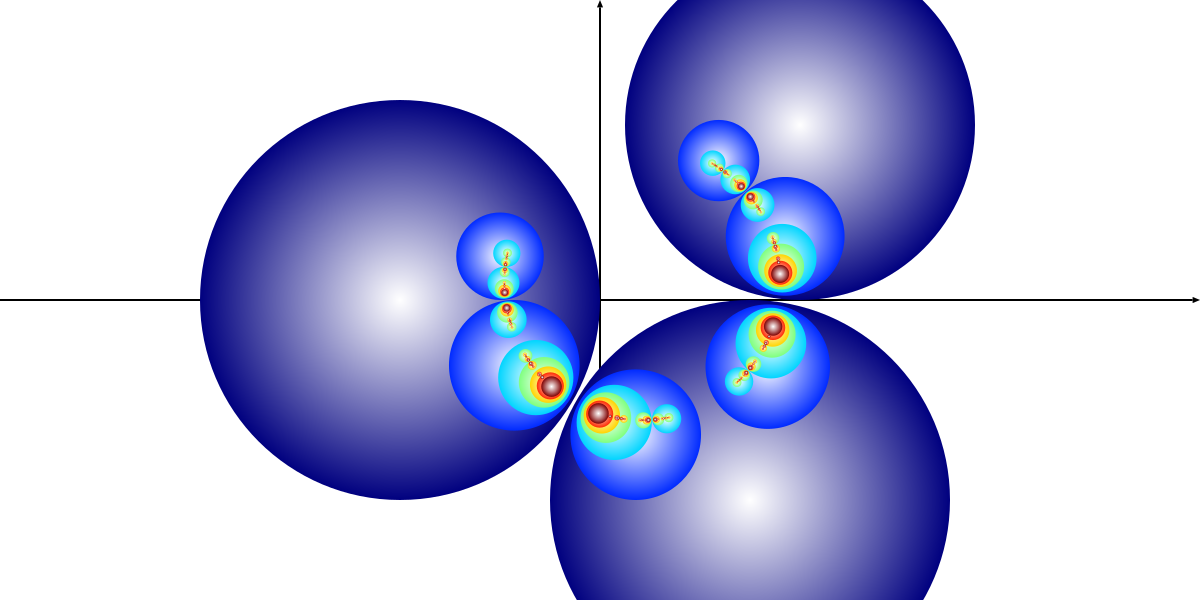

In [91]:
Gr.configure(rect=(-6,6,-3,3), style=:pearl, colormap=:jet)
drawcirclessetorbit(inversions, inversioncircles, traverse=:firstbreath, iterations=6, paired=true)

Para el grupo de la carpeta de apolonio, podemos dibujar la órbita de cierto conjunto epecial de círculos.

In [92]:
specialcircles = [Circle(1000im,1000),Circle(-1-im,1), Circle(-0.25im,0.25), Circle(1-im,1)];

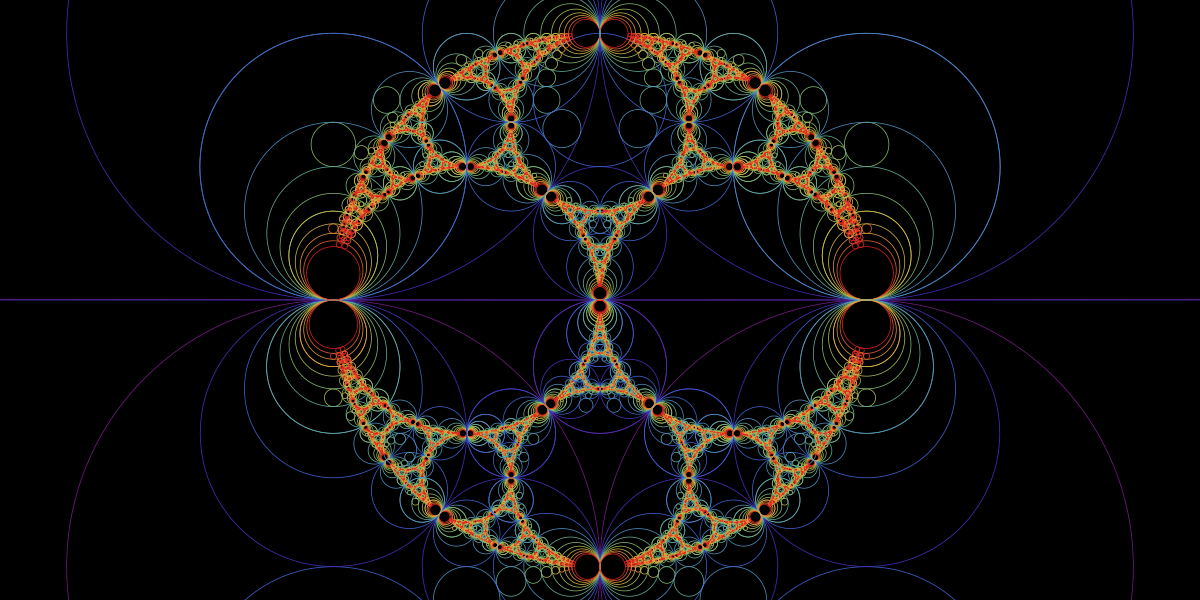

In [94]:
Gr.configure(rect=(-9/4,9/4,-9/8,9/8), style=:stroke, colormap=:rainbow, bgcolor=RGB(0,0,0))
drawcirclessetorbit(apollonian, specialcircles, iterations=10)

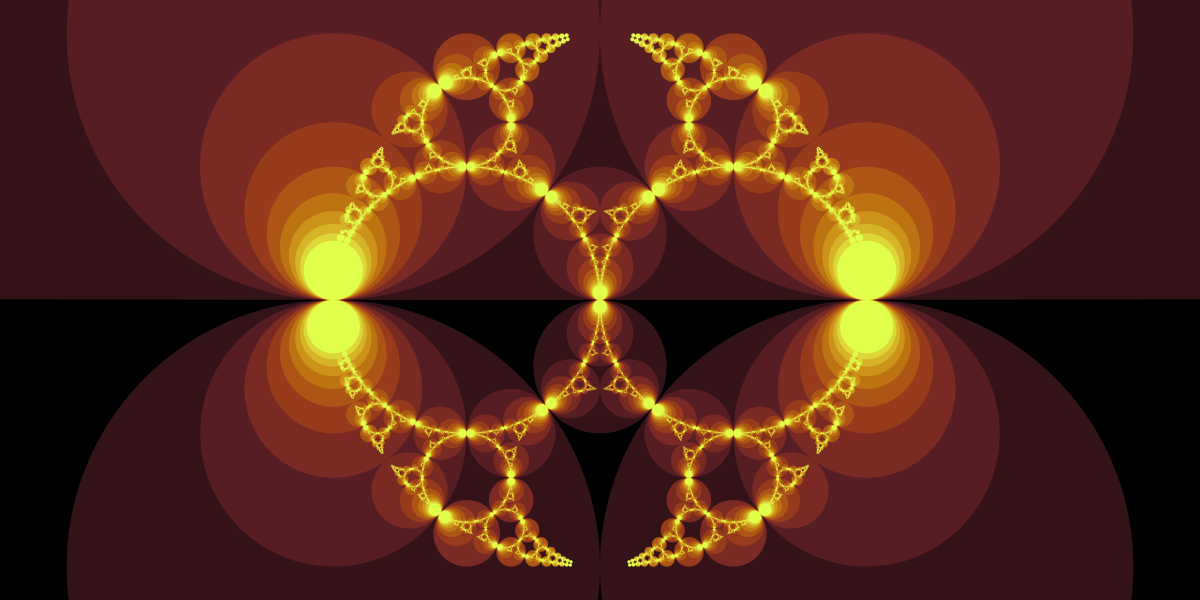

In [95]:
Gr.configure(rect=(-9/4,9/4,-9/8,9/8), style=:fill, colormap=:solar)
drawcirclessetorbit(apollonian, specialcircles, iterations=9, traverse=:firstbreath, paired=true)

## Conjuntos límite

El **conjunto límite** de un grupo discreto grupo discreto $\Gamma<PSL(2,\mathbb{C})$ es el conjunto de puntos de acumulación de las órbitas de cualquier punto y se denota como

$$\Lambda(\Gamma)$$

Hemos implementado diversos algoritmos para dibujar dichos conjuntos límite.

Para dibujar los puntos de acumulación (aproximados) de una orbita, se usa `drawΛ`.

Dibujemos por ejemplo el conjunto límite de un grupo casi-Fuchsiano $\big<\gamma_1,\gamma_2\big>$.

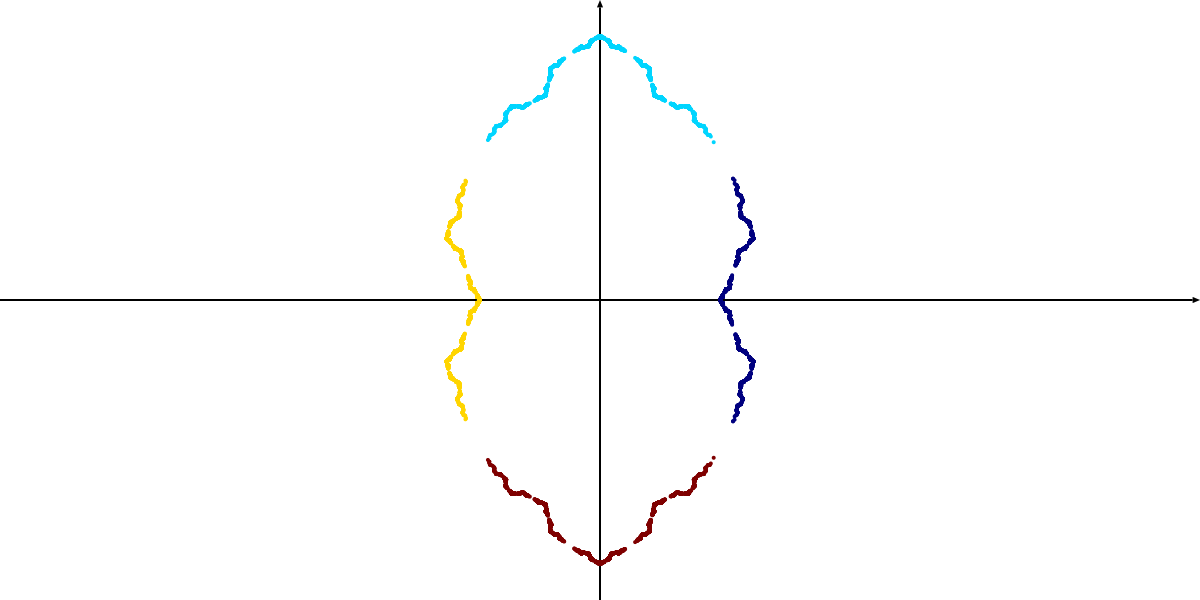

In [96]:
Gr.configure(rect=(-5,5,-2.5,2.5), pointsize=2, colormap=:jet, bgcolor=RGB(1,1,1))
drawΛ([γ1, γ2], 1, iterations=10)

Se puede caractarizar el conjunto límite como

$$\Lambda(\Gamma)=\overline{\bigcup_{\gamma\in\Gamma\,loxodromica} Fix(\gamma)}$$

Para dibujar el conjunto límite como unión de puntos fijos tenemos la instrucción `drawfixedpointsΛ`.

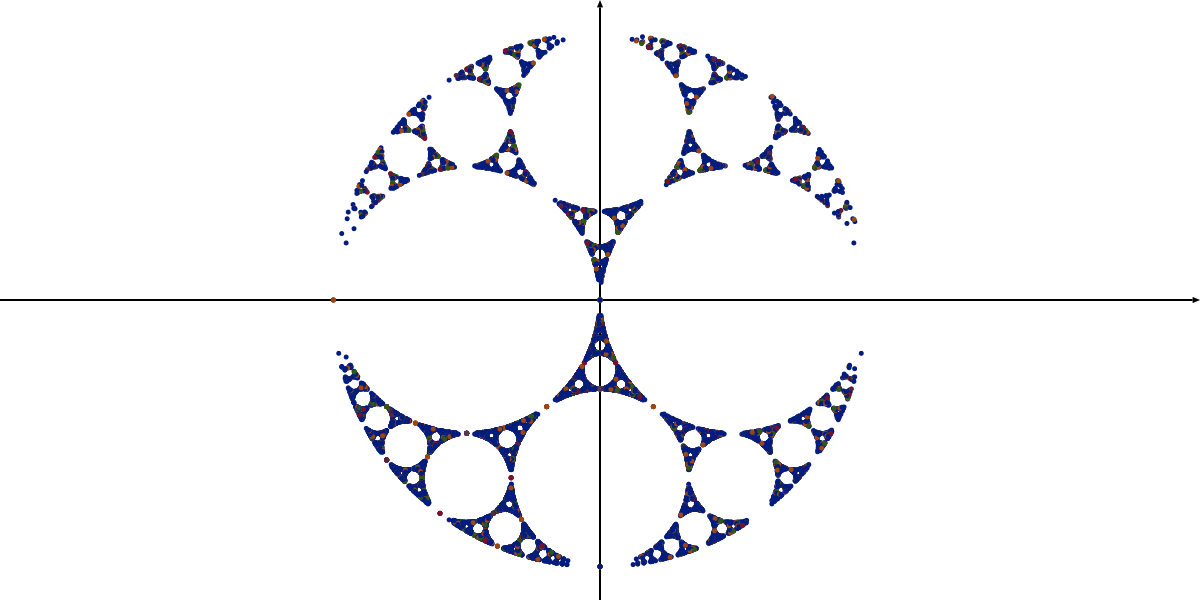

In [97]:
Gr.configure(rect=(-9/4,9/4,-9/8,9/8), pointsize=2.5, colormapinv=:seaborn_dark)
drawfixedpointsΛ(apollonian, iterations=9)

Finalmente, se pueden aproximar los conjuntos límite utilizando una adaptación del algoritmo del *juego del
caos* para dibujar atractores de sistemas de funciones contractoras iteradas.

La instrucción de este algoritmo adaptado es `drawchaosgameΛ`.

El algoritmo del juego del caos consiste en dibujar una "órbita aleatoria" de puntos eligiendo aleatoriamente las transformaciones.

Y en la adaptación a grupos sólo se evitan posibles cancelaciones de composición de transformaciones con sus inversas.

Veamos un atractor de un sistema de funciones iteradas.

In [98]:
function drawchaosgameattractor(generators::Vector{F}, z0=0; preiterations::Int=1000, iterations::Int=2000) where F <: Function
    Gr.newdrawing()
    N = length(generators)
    Gr.updatecolorarray(N)
    zn = z0
    for n in 1:preiterations
        zn = generators[rand(1:N)](zn)
    end
    k = 1
    for n in 1:iterations
        k = rand(1:N)
        zn = generators[k](zn)
        if Gr.insiderectregion(zn)
            Gr.color(k)
            Gr.drawpoint(zn)
        end
    end
    Gr.drawing()
end

drawchaosgameattractor (generic function with 2 methods)

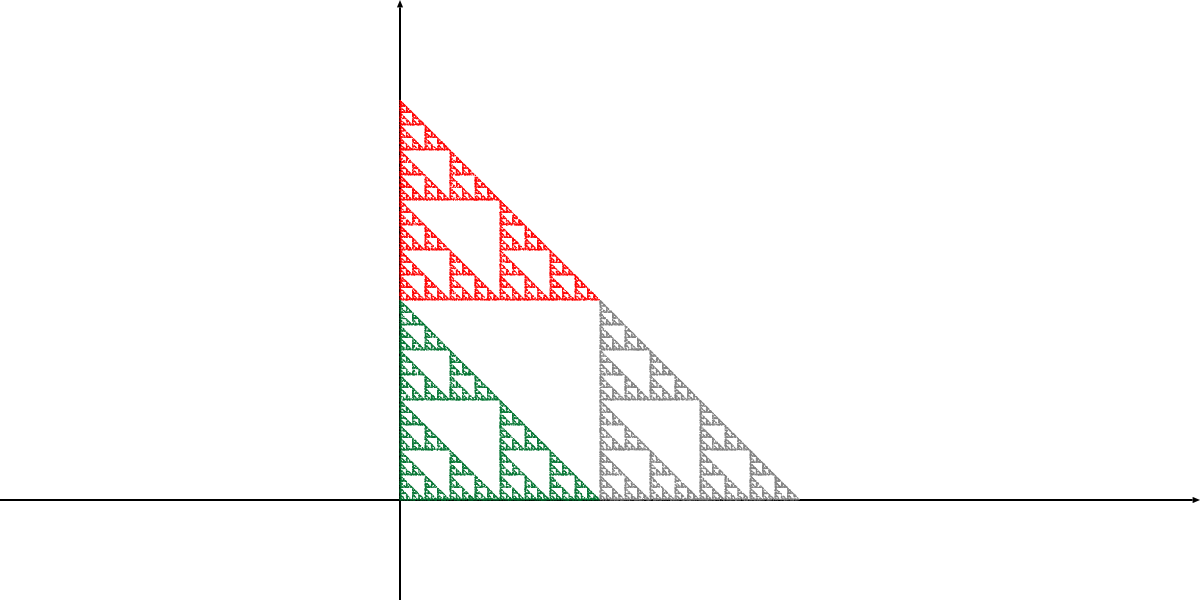

In [99]:
contractions = [LinearTransformation(0.5), AffineTransformation(0.5,1), AffineTransformation(0.5,im)]
Gr.configure(rect=(-2,4,-0.5,2.5), pointsize=0.5, colormap=:flag_ae)
drawchaosgameattractor(contractions, iterations=50000)

Ahora dibujaremos el conjunto límite usando el juego del caos de un grupo de la familia de grupos casi-Fuchsiano generados por

$$ \gamma_1(z)=\frac{\frac{t_a}{2}z+\frac{t_a t_{ab}-2t_b+4i}{(2t_{ab}+4)z_0}}{\frac{t_a t_{ab}-2t_b-4i}{2t_{ab}-4}z_0 z+\frac{t_a}{2}} $$

$$ \gamma_2(z)=\frac{\frac{t_b-2i}{2}z+\frac{t_b}{2}}{\frac{t_b}{2}z+\frac{t_b+2i}{2}} $$

con $z_0=\frac{(t_{ab}-2)t_b}{t_{ab}t_b-2it_{ab}}$ y $t_{ab}$ raiz de $z^2-t_a t_b z + t_a^2 + t_b^2$.

In [100]:
ta = 1.87 + 0.1im
tb = 1.87 - 0.1im
tab = (ta*tb + sqrt(complex(ta*ta*tb*tb-4(ta*ta+tb*tb))))/2
z0 = (tab-2)*tb/(tab*tb-2ta+2im*tab)
a1 = ta/2
b1 = (ta*tab-2tb+4im)/((2tab+4)*z0)
c1 = (ta*tab-2tb-4im)*z0/(2tab-4)
a2 = (tb-2im)/2
b2 = tb/2
d2 = (tb+2im)/2

snail1 = [MobiusTransformation(a1,b1,c1,a1), MobiusTransformation(a2,b2,b2,d2)]

2-element Vector{MobiusTransformation{ComplexF64}}:
 (::MobiusTransformation{ComplexF64}) (generic function with 6 methods)
 (::MobiusTransformation{ComplexF64}) (generic function with 6 methods)

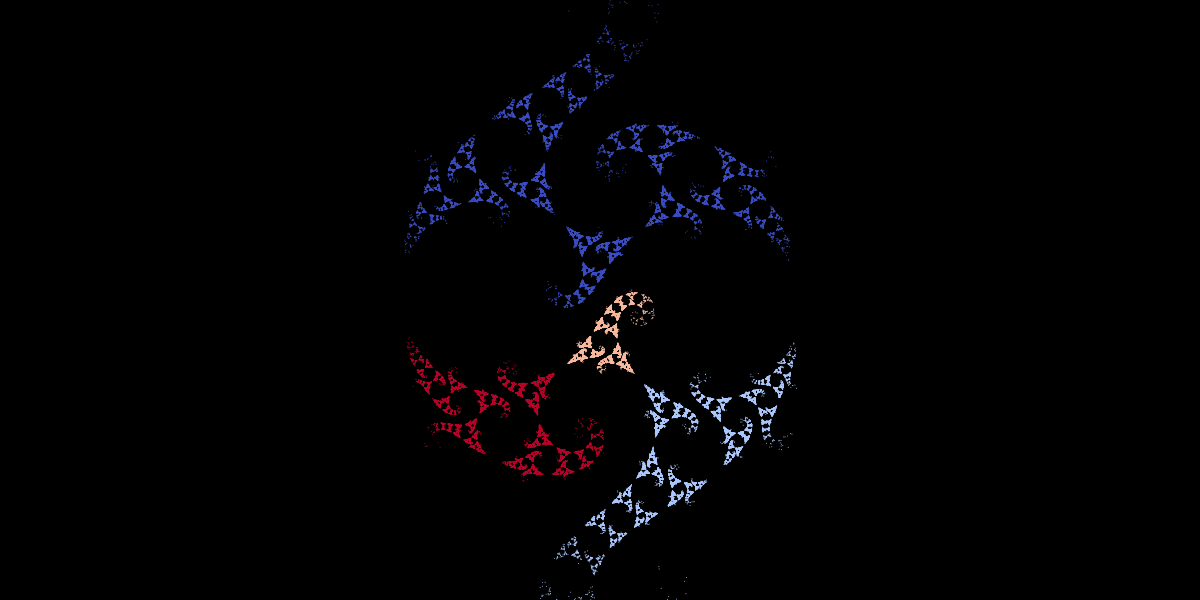

In [101]:
Gr.configure(rect=(-3,3,-1.5,1.5), pointsize=0.5, colormap=:coolwarm, bgcolor=RGB(0,0,0))
drawchaosgameΛ(snail1, 0, preiterations=1000, iterations=200000)

## Trabajo futuro

Estamos trabajando en lo siguiente, que debe estar finalizado a principios de Enero del 2022:

- Graficación de conjuntos límite conexos (curvas fractales).

- Cálculo de la dimensión fractal (de caja) de conjuntos límite.

- Aplicación de fácil uso para estudiantes, profesores e investigadores no programadores.

Claro, hay mucho más que podríamos y nos gustaría hacer, pero está fuera de lo prometido para el proyecto, será trabaja mucho más a futuro:
- Otros algoritmos especializados para dibujo de conjuntos límite de ciertos grupos.
- Graficación de teselaciones por regiones fundamentales.
- Algoritmos especializados para cálculo de dimensión fractal para ciertos grupos.
- Graficación en 3D.
- Extensiones de Poincaré para grupos de isometrías en $\mathbb{H}^3$.
- ... ¡Etcétera!

Para finalizar esta presentación...

Hacemos la invitación a todas las personas interesadas a usar y a contribuir a este software libre.

<center>

# ¡Gracias!
    
</center>

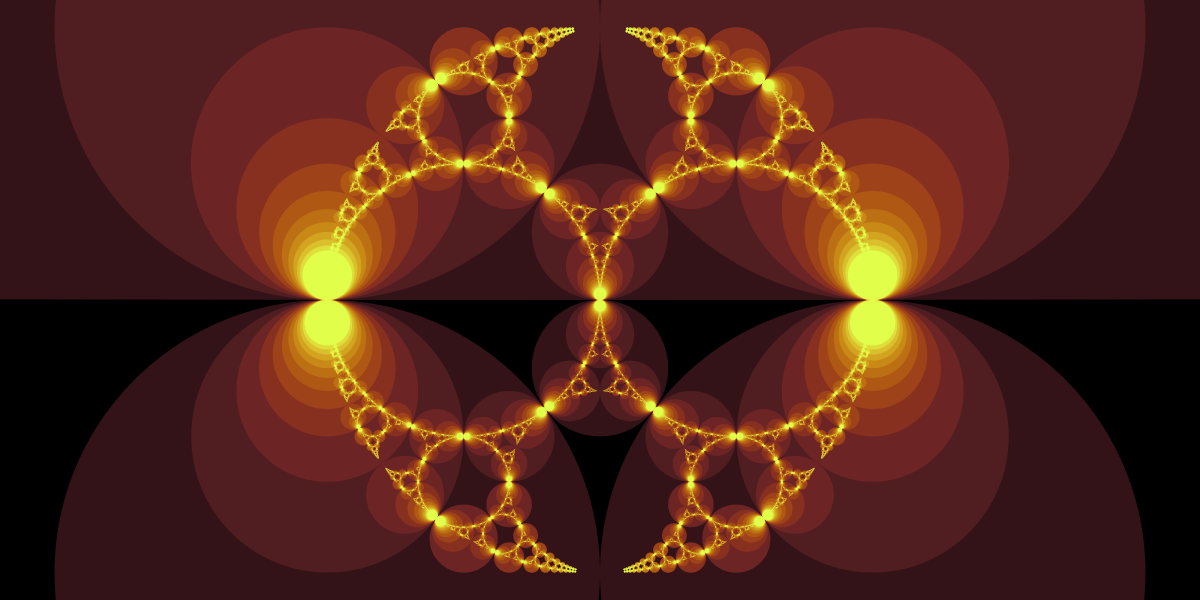

In [18]:
Gr.configure(rect=(-11/5,11/5,-11/10,11/10), canvas=(1200,600), style=:fill, colormap=:solar, bgcolor=RGB(0,0,0))
drawcirclessetorbit(apollonian, specialcircles, iterations=11, traverse=:firstbreath, paired=true)

In [ ]:
# fin

In [25]:
knot8 = [MobiusTransformation(1,0,-1,1), AffineTransformation(1, (-1+sqrt(3)*im)/2)]

2-element Vector{AbstractMobiusTransformation}:
 (::MobiusTransformation{Int64}) (generic function with 6 methods)
 (::AffineTransformation{ComplexF64}) (generic function with 6 methods)

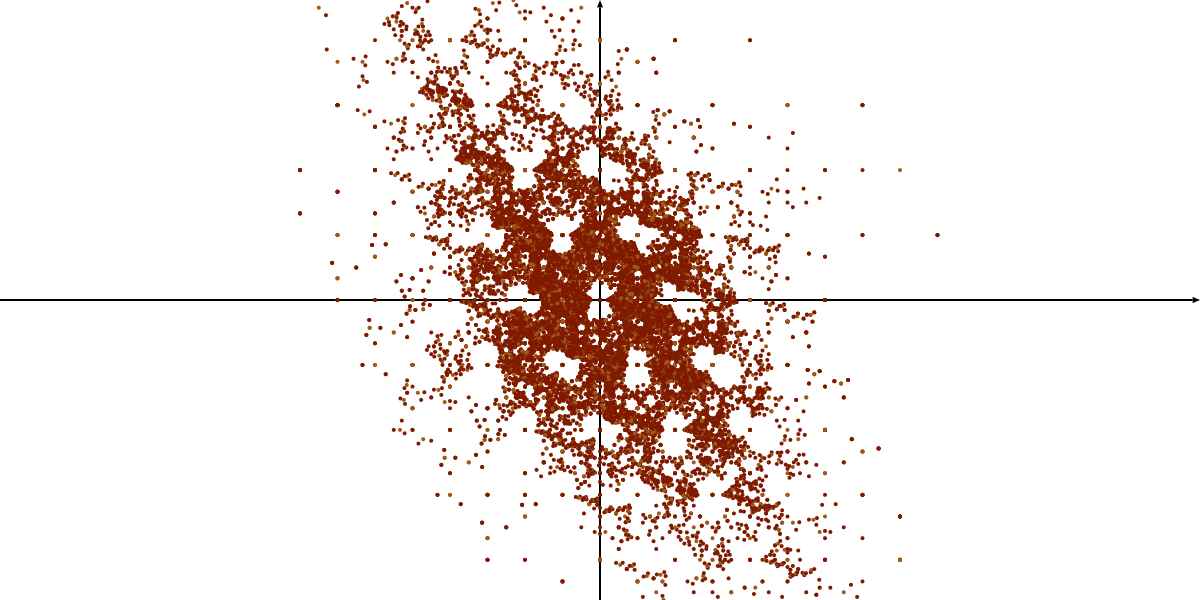

In [33]:
Gr.configure(rect=(-8,8,-4,4), canvas=(1200,600), pointsize=2, colormapinv=:roma)
drawpointorbit(knot8, 1, preiterations=8, iterations=1)

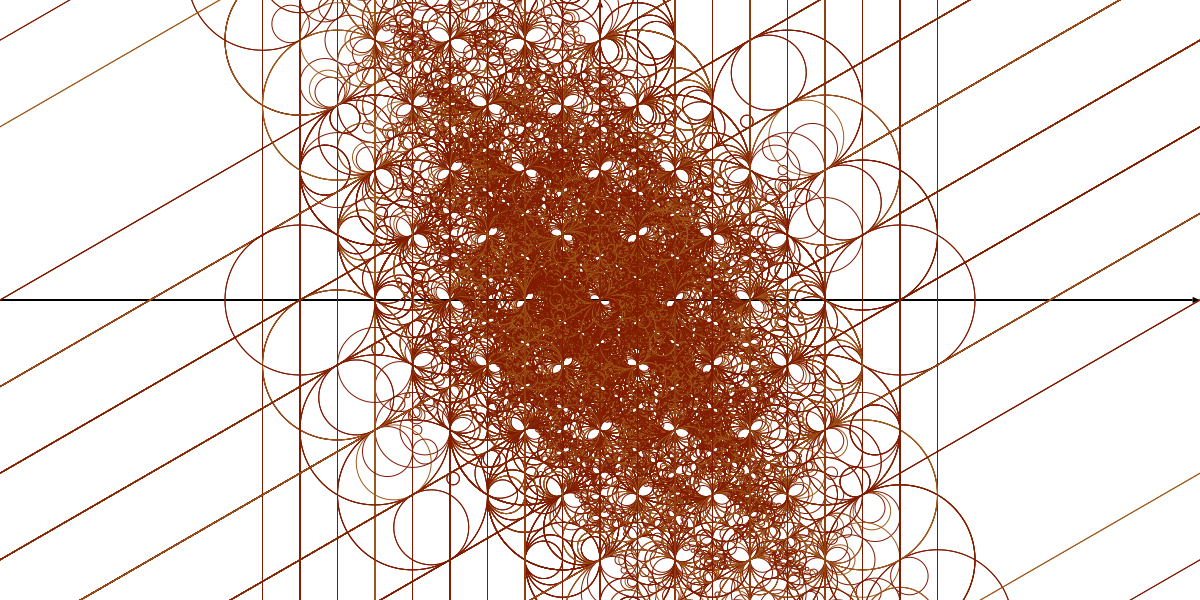

In [34]:
Gr.configure(rect=(-8,8,-4,4), canvas=(1200,600), pointsize=2, colormapinv=:roma)
drawcircleorbit(knot8, Circle(0,1), preiterations=8, iterations=1)

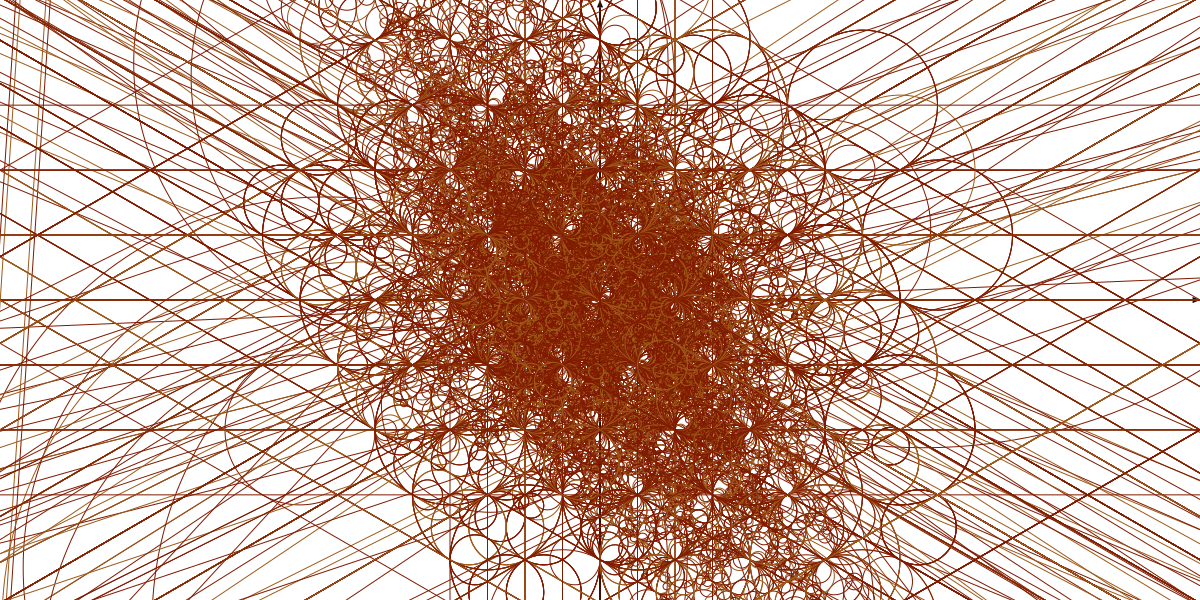

In [38]:
Gr.configure(rect=(-8,8,-4,4), canvas=(1200,600), pointsize=2, colormapinv=:roma)
drawcircleorbit(knot8, Circle(1,1), preiterations=8, iterations=1)

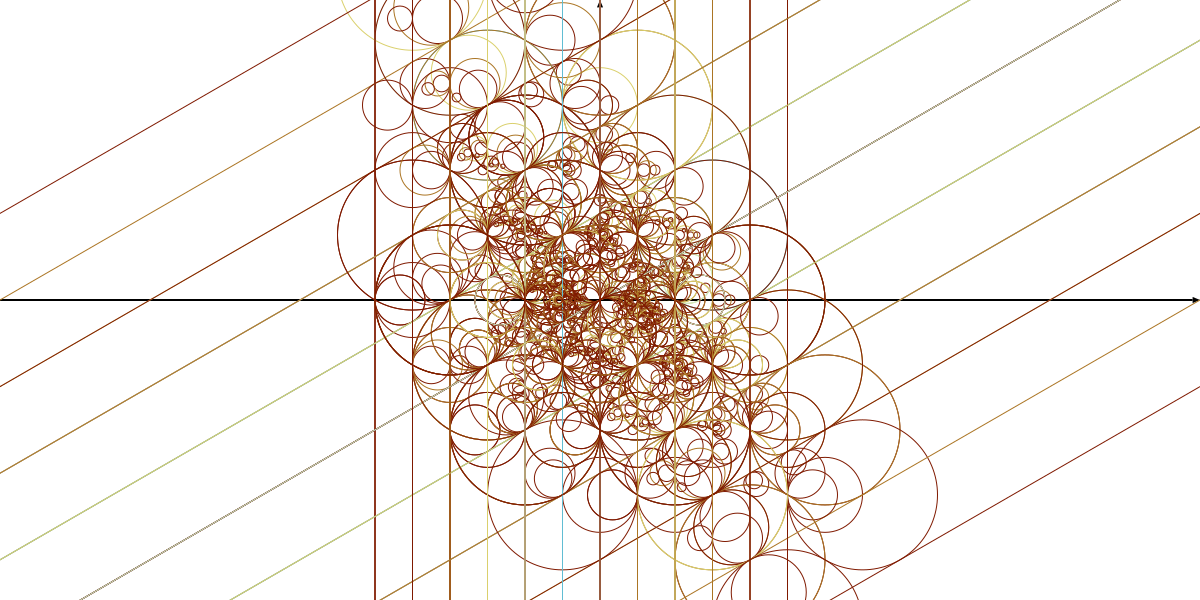

In [44]:
Gr.configure(rect=(-8,8,-4,4), canvas=(1200,600), pointsize=2, colormapinv=:roma)#abs((-1+sqrt(3)*im)/2)
drawcircleorbit(knot8, Circle((-1+sqrt(3)*im)/2,1), preiterations=0, iterations=6)